# Patient

In [ ]:
import pandas as pd
trento = pd.read_csv('/content/Trentofeatures.csv', delimiter=';',decimal=',')
audio = pd.read_csv('/content/audioanalysis_summary.csv',delimiter=';',decimal=',')
movement = pd.read_csv('/content/head_movement.csv',delimiter=';',decimal=',')
face = pd.read_csv('/content/summarized_file.csv',delimiter=';',decimal=',')
# slopes = pd.read_csv('/content/slopes_o.csv')

columns_to_remove = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
VA_text = pd.read_csv('text_VA.csv', delimiter=',')
# VA_text.drop(columns=columns_to_remove, inplace=True)

rating = pd.read_csv('/content/Therapist_ratings.csv', delimiter=';')
rating = rating.apply(pd.to_numeric, errors='coerce')
rating['session'] = rating['session'] - 1

overlap_df = pd.read_csv('overlap2_.csv', delimiter=';')

merged_df_o = pd.merge(trento, audio, on=['ppnr', 'session'], how='outer')
merged_df_o = pd.merge(merged_df_o, movement, on=['ppnr', 'session'], how='outer')
merged_df_o = pd.merge(merged_df_o, face, on=['ppnr', 'session'], how='outer')
merged_df_o = pd.merge(merged_df_o, rating, on=['ppnr', 'session'])

merged_df_o = pd.merge(merged_df_o, VA_text, on=['ppnr', 'session'], how='outer')
# merged_df_o = pd.merge(merged_df_o, VA_text_min, on=['ppnr', 'session'], how='outer')
# merged_df_o = pd.merge(merged_df_o, emo_text, on=['ppnr', 'session'], how='outer')
# merged_df_o = pd.merge(merged_df_o, audiomin, on=['ppnr', 'session'], how='outer')
merged_df_o = pd.merge(merged_df_o, overlap_df, on=['ppnr', 'session'])

column_averages = merged_df_o.mean()
merged_df_o.fillna(column_averages, inplace=True)

merged_df_o = merged_df_o.drop_duplicates(subset=['ppnr', 'session'])
merged_df_o.reset_index(drop=True, inplace=True)

# Convert all columns to numeric (including non-numeric strings will be converted to NaN)
merged_df_o = merged_df_o.apply(pd.to_numeric, errors='coerce')
df = merged_df_o

<ipython-input-120-7c0c54960bbc>:43: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_averages = merged_df_o.mean()


In [ ]:
import pandas as pd


# Assuming you have a DataFrame called 'df' with the desired columns
bond_columns = ['t2', 't5', 't7','t9']
goal_columns = ['t3', 't4', 't8']
task_columns = ['t1', 't2', 't6', 't10']
all_cols = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_cols].sum(axis=1)

df['total_wai'] = total_wai
df['task_df'] = task_df
df['goal_df'] = goal_df
df['bond_df'] = bond_df

cols = df.columns

columns_to_exclude = ['ppnr', 'session','t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10' ,'1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','bond_df','goal_df'
,'task_df','total_wai']

# Remove specified columns from the DataFrame
cols_cleaned = [col for col in cols if col not in columns_to_exclude]



In [ ]:
import pandas as pd
df = pd.read_csv('/content/12-8_pat.csv')

feat_df = pd.read_csv('/content/mrmr_filtered_df_pat.csv')
features_mrmr = feat_df[feat_df['Importance'] > 0]["Feature"]

In [ ]:
df['4'] = 7 - df['4']
df['10'] = 7 - df['10']

bond_columns = ['3', '5', '7','9']
goal_columns = ['1', '4', '8','11']
task_columns = ['2', '6', '10','12']
all_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_columns].sum(axis=1)

df['total_wai'] = total_wai
df['task_df'] = task_df
df['goal_df'] = goal_df
df['bond_df'] = bond_df

cols = df.columns

columns_to_exclude = ['ppnr', 'session','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','bond_df','goal_df'
,'task_df','total_wai']

# Remove specified columns from the DataFrame
cols_cleaned = [col for col in cols if col not in columns_to_exclude]



In [ ]:
cols_cleaned_o = ['nr_of_turns','turn_level_freedom','avgturnlength_patient','avgturnlength_therapist','approval_text','disapproval_text',
                'disgust_text','remorse_text','confusion_text','excitement_text','nod_speaker0_listening','shake_speaker0_listening','anger','max_valence_audio','max_arousal_audio','min_valence_audio']

In [ ]:
cols_cleaned_t =['nr_of_turns','speechrate_speaker_patient','turn_level_freedom','sadness','neutral','disgust_text','durationpercentage_therapist',
                 'avgturnlength_therapist','avgturnlength_patient','max_valence_audio','max_arousal_audio','min_valence_audio','nr_positive_text']

In [ ]:
cols_cleaned_p = ['duration_patient','participation_equality','duration_therapist','avgturnlength_therapist','speechrate_speaker_patient','turn_level_freedom','nod_speaker0_listening',
                  'nod_speaker1_listening','shake_speaker1_listening','shake_speaker0_listening','happiness'
                 ,'anger','amusement_text','min_arousal_SPEAKER_00']

In [ ]:
features_spearman = ['mean_waittime', 'median_waittime',
       'std_waittime', 'nr_of_turns', 'turns_therapist',
       'turns_speaker_patient', 'duration_therapist', 'duration_patient',
       'participation_equality', 'turn_level_freedom',
       'avgturnlength_therapist', 'avgturnlength_patient',
       'wordcount_speaker_therapist', 'wordcount_speaker_patient',
       'speechrate_speaker_therapist', 'speechrate_speaker_patient',
       'speechduration_therapist', 'speechduration_patient',
       'durationpercentage_therapist', 'durationpercentage_patient',
       ]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer


# Select features
features = df[features_mrmr] # features that were important according to mrmr analysis

# Prepare outcome variables
outcome_bond = df['total_wai']

# Handle missing values in features using an imputer
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Train the model for bond_df
t_bond = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=1,min_samples_leaf=5)
t_bond.fit(features_imputed, outcome_bond)

# Calculate out-of-bag MSE for bond_df
oob_error_bond = 1 - t_bond.score(features_imputed, outcome_bond)
print("Out-of-Bag MSE for total wai:", oob_error_bond)

# Cross-validation for bond_df
predicted_bond = cross_val_predict(t_bond, features_imputed, outcome_bond, cv=10)
mse_bond = mean_squared_error(outcome_bond, predicted_bond)
print("Cross-validation MSE for total wai:", mse_bond)

# Mean MSE for bond_df
mean_mse_bond = np.mean(mse_bond)
print("Mean MSE for total wai:", mean_mse_bond)

# Calculate R-squared for bond_df
r_squared_bond = t_bond.score(features_imputed, outcome_bond)
print("R-squared for total wai:", r_squared_bond)


# Cross-validation
predicted_bond = cross_val_predict(t_bond, features_imputed, outcome_bond, cv=10)
mse_bond = mean_squared_error(outcome_bond, predicted_bond)
rmse_bond = np.sqrt(mse_bond)  # Calculate RMSE from MSE
print("RMSE :", rmse_bond)

# Calculate mean MAE
mae_bond = mean_absolute_error(outcome_bond, predicted_bond)
print("MAE:", mae_bond)


Out-of-Bag MSE for total wai: 0.6760513291986885
Cross-validation MSE for total wai: 110.08253906601789
Mean MSE for total wai: 110.08253906601789
R-squared for total wai: 0.3239486708013115
RMSE : 10.492022639416
MAE: 7.219571809620093


In [ ]:
# observer
spearman
RMSE : 10.184372449223137
MAE: 6.92718719629449

mrmr
RMSE : 7.024107969182322
MAE: 5.370766384228388

no
RMSE : 10.755928117690724
MAE: 7.395100194600922

# patient
spearman
RMSE : 5.612903949704871
MAE: 4.210820683731236

mrmr
RMSE : 5.9202180843865015
MAE: 4.401640027294368

no
RMSE : 8.972048702343587
MAE: 6.910784397912631

# therapist
spearman
RMSE : 3.9924680278881297
MAE: 3.354441156264682

mrmr
RMSE : 4.009980178151807
MAE: 3.2768693790485615

no
RMSE : 3.9734035595983834
MAE: 3.3136817119475763

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each dataset
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest regressor with GridSearchCV
grid_search_bond = GridSearchCV(RandomForestRegressor(random_state=1), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_bond.fit(features_imputed, outcome_bond)

# Get the best hyperparameters
best_params_bond = grid_search_bond.best_params_
print("Best Hyperparameters:", best_params_bond)

# Train the Random Forest regressor with the best hyperparameters
t_bond = RandomForestRegressor(**best_params_bond, random_state=1)
t_bond.fit(features_imputed, outcome_bond)


# Calculate out-of-bag MSE
oob_error_bond = 1 - t_bond.score(features_imputed, outcome_bond)
print("Out-of-Bag MSE :", oob_error_bond)

# Cross-validation
predicted_bond = cross_val_predict(t_bond, features_imputed, outcome_bond, cv=10)
mse_bond = mean_squared_error(outcome_bond, predicted_bond)
print("Cross-validation MSE :", mse_bond)

# Calculate mean MSE
mean_mse_bond = np.mean(mse_bond)
print("Mean MSE :", mean_mse_bond)

# Calculate R-squared for bond_df
r_squared_bond = t_bond.score(features_imputed, outcome_bond)
print("R-squared for total wai:", r_squared_bond)

# Cross-validation
predicted_bond = cross_val_predict(t_bond, features_imputed, outcome_bond, cv=10)
mse_bond = mean_squared_error(outcome_bond, predicted_bond)
rmse_bond = np.sqrt(mse_bond)  # Calculate RMSE from MSE
print("RMSE :", rmse_bond)

# Calculate mean MAE
mae_bond = mean_absolute_error(outcome_bond, predicted_bond)
print("MAE:", mae_bond)

## statsmodel

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.signal import correlate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Define outcome variable
outcome_variable = df['total_wai']

# Only use the features selected by the MRMR algorithm
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_imputed)

# Create a linear regression model
model = LinearRegression()

# Perform cross-validation and get predicted values for each fold
predicted_values_cv = cross_val_predict(model, normalized_features, outcome_variable, cv=5)

# Calculate evaluation metrics
rmse_cv = np.sqrt(mean_squared_error(outcome_variable, predicted_values_cv))
mse_cv = mean_squared_error(outcome_variable, predicted_values_cv)
variance_cv = r2_score(outcome_variable, predicted_values_cv)
mae_cv = mean_absolute_error(outcome_variable, predicted_values_cv)
crosscorr_cv = correlate(predicted_values_cv - np.mean(predicted_values_cv),
                         outcome_variable - np.mean(outcome_variable), mode='full')

# Print evaluation metrics
print("Cross-Validation Root Mean Squared Error (RMSE):", rmse_cv)
print("Standard Deviation of Cross-Validation RMSE:", np.std(rmse_cv))

print("Cross-Validation Mean Squared Error (MSE):", mse_cv)
print("Cross-Validation Variance (R-squared):", variance_cv)
print("Cross-Validation Mean Absolute Error (MAE):", mae_cv)



Cross-Validation Root Mean Squared Error (RMSE): 11.915739138367345
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation Mean Squared Error (MSE): 141.98483921361935
Cross-Validation Variance (R-squared): -3.2151820382451133
Cross-Validation Mean Absolute Error (MAE): 8.168230784060256


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate baseline value (e.g., mean of the outcome variable)
baseline_value = np.mean(outcome_variable)


# Calculate the standard deviation of the outcome variable
std_outcome = np.std(outcome_variable)

# Calculate the coefficient of variation (CV)
cv_rmse = rmse_cv / std_outcome

# Print the comparison with baseline
print("Baseline Value:", baseline_value)
print("Cross-Validation RMSE:", rmse_cv)
print("Coefficient of Variation (CV):", cv_rmse)


Baseline Value: 34.883720930232556
Cross-Validation RMSE: 11.915739138367345
Coefficient of Variation (CV): 2.05309084997355


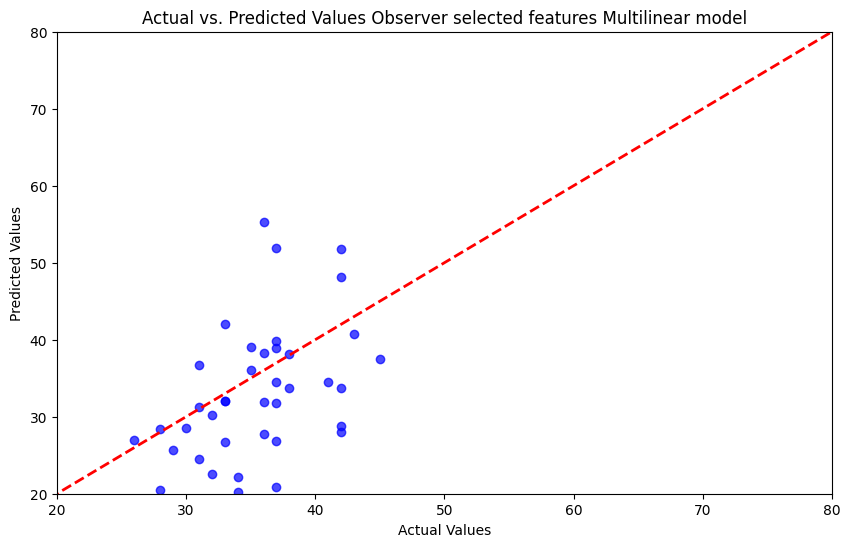

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(outcome_variable, predicted_values_cv, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Observer selected features Multilinear model')

# Set x and y axis limits
plt.xlim(20, 80)
plt.ylim(20, 80)

# Add a diagonal line (perfect predictions)
plt.plot([0, 150], [0, 150], color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(outcome_variable, predicted_values, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Observer selected features Multilinear model')

# Set x and y axis limits
plt.xlim(20, 80)
plt.ylim(20, 80)

# Add a diagonal line (perfect predictions)
plt.plot([0, 150], [0, 150], color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()


## multilinear regression

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

features = df[features_mrmr]

# Only use the features selected by the MRMR algorithm
features_filtered = sm.add_constant(features)

imputer = SimpleImputer(strategy='mean')
features_filtered_n = imputer.fit_transform(features_filtered)

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_filtered_n)

# Define a range of regularization strengths to search
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

# Create a RidgeCV model with cross-validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_alpha = ridge_cv.fit(normalized_features, outcome_variable).alpha_

# The best_alpha variable now contains the optimal regularization strength
print("Optimal Regularization Strength (alpha):", best_alpha)

# Create the linear regression model with the optimal regularization strength
model = sm.GLM(outcome_variable, normalized_features, family=sm.families.Gaussian(), alpha=best_alpha)

# Fit the model
results = model.fit()

# Print the summary of the results
print(results.summary())

# Calculate predictions
predicted_values = results.predict(normalized_features)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(outcome_variable, predicted_values))
mse = mean_squared_error(outcome_variable, predicted_values)
variance = 1 - (results.deviance / np.var(outcome_variable))  # Explained Variance

# Print evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Explained Variance:", variance)


Optimal Regularization Strength (alpha): 10.0
                 Generalized Linear Model Regression Results                  
Dep. Variable:              total_wai   No. Observations:                   34
Model:                            GLM   Df Residuals:                       21
Model Family:                Gaussian   Df Model:                           12
Link Function:               Identity   Scale:                          5178.0
Method:                          IRLS   Log-Likelihood:                -185.44
Date:                Mon, 14 Aug 2023   Deviance:                   1.0874e+05
Time:                        10:17:44   Pearson chi2:                 1.09e+05
No. Iterations:                     3   Pseudo R-squ. (CS):            -0.6499
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['alpha']
  warnings.warn(msg, ValueWarning)


## XGBregressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

outcome_variable = df['total_wai']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome_variable, test_size=0.4, random_state=42)

# Normalize the features to have mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train_normalized = imputer.fit_transform(X_train_normalized)
X_test_normalized = imputer.transform(X_test_normalized)

# Create and fit the XGBoost regression model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(xgb_model, X_train_normalized, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE

# Fit the model on the training data
xgb_model.fit(X_train_normalized, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_normalized)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Cross-Validation RMSE:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", np.mean(cv_rmse_scores))
print("Standard Deviation of Cross-Validation RMSE:", np.std(cv_rmse_scores))
print("Test Set Mean Absolute Error (MAE):", mae)
print("Test Set MSE:", mse)
print("Test Set R-squared:", r2)
print("Test Set Root Mean Squared Error (RMSE):", np.sqrt(mse))



print("Cross-Validation Mean Squared Error (MSE):", mse_cv)
print("Cross-Validation Variance (R-squared):", variance_cv)
print("Cross-Validation Mean Absolute Error (MAE):", mae_cv)

# Calculate baseline value (e.g., mean of the outcome variable)
baseline_value = np.mean(outcome_variable)

# Calculate the RMSE of your model
rmse_cv = np.mean(cv_rmse_scores)

# Calculate the standard deviation of the outcome variable
std_outcome = np.std(outcome_variable)

# Calculate the coefficient of variation (CV)
cv_rmse = rmse_cv / std_outcome

# Print the comparison with baseline
print("Baseline Value:", baseline_value)
print("Cross-Validation RMSE:", rmse_cv)
print("Coefficient of Variation (CV):", cv_rmse)



Cross-Validation RMSE: [12.34893294 12.91455677 13.79743169 12.2828814   6.04738476]
Mean Cross-Validation RMSE: 11.478237511652486
Standard Deviation of Cross-Validation RMSE: 2.769165890057599
Test Set Mean Absolute Error (MAE): 3.5184718237982855
Test Set MSE: 19.687778402841406
Test Set R-squared: -0.5820536216568988
Test Set Root Mean Squared Error (RMSE): 4.437091209659928
Cross-Validation Mean Squared Error (MSE): 141.98483921361935
Cross-Validation Variance (R-squared): -3.2151820382451133
Cross-Validation Mean Absolute Error (MAE): 8.168230784060256
Baseline Value: 34.883720930232556
Cross-Validation RMSE: 11.478237511652486
Coefficient of Variation (CV): 1.9777089893750226


In [ ]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xg
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome_variable, test_size=0.2, random_state=42)

# Normalize the features to have mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train_normalized = imputer.fit_transform(X_train_normalized)
X_test_normalized = imputer.transform(X_test_normalized)

# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train_normalized, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train_normalized, y_train)


pred = xgb_r.predict(X_test_normalized)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

# Calculate R-squared
r2 = r2_score(y_test, pred)

print('RMSE: %.3f' % rmse)
print('R-squared: %.3f' % r2)


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt

def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])

    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target], eval_metric='rmse')

    # Print model report
    dtrain_predictions = alg.predict(dtrain[predictors])
    rmse = np.sqrt(metrics.mean_squared_error(dtrain[target], dtrain_predictions))
    print("\nModel Report")
    print("RMSE : % f" % (rmse))

    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

# Assuming 'X_train_normalized' and 'y_train' are already defined
target = 'total_wai'
predictors = X_train_normalized.columns  # Adjust this to your actual feature names

param_test1 = {
 'max_depth': range(3, 10, 2),
 'min_child_weight': range(1, 6, 2)
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1, n_estimators=140, max_depth=5,
                                               min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                               objective='reg:squarederror', nthread=4, seed=27),
                        param_grid=param_test1, n_jobs=4, cv=5)

gsearch1.fit(X_train_normalized, y_train)

print('Best parameters:', gsearch1.best_params_)
print('Best RMSE:', np.sqrt(-gsearch1.best_score_))  # Note the negative sign


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you have 'features' and 'outcome_variable' defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome_variable, test_size=0.2, random_state=1)

# Normalize the features to have mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Create the XGBoost regression model
xgb_model = XGBRegressor(random_state=42)

# Define hyperparameters and their possible values for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)


# Perform grid search
grid_search.fit(X_train_normalized, y_train)

# Get the best parameters and estimator from grid search
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Apply cross-validation and predict outcomes
cv_predictions = cross_val_predict(best_xgb_model, X_train_normalized, y_train, cv=5)

# Calculate Mean Squared Error (MSE) for each fold
cv_mse_scores = mean_squared_error(y_train, cv_predictions)

# Calculate R-squared for each fold
cv_r2_scores = 1 - (cv_mse_scores / np.var(y_train))

# Calculate the RMSE for each fold from MSE scores
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Print R-squared statistics
print("Cross-Validation R-squared Scores:", cv_r2_scores)
print("Mean Cross-Validation R-squared:", np.mean(cv_r2_scores))


# # Apply cross-validation and predict outcomes
# cv_predictions = cross_val_predict(best_xgb_model, X_train_normalized, y_train, cv=5)

# # Calculate Mean Absolute Error (MAE)
# cv_mae = mean_absolute_error(y_train, cv_predictions)

# # Calculate Mean Squared Error (MSE) and R-squared for each fold
# cv_mse_scores = mean_squared_error(y_train, cv_predictions)
# cv_r2_scores = r2_score(y_train, cv_predictions)

# # Calculate the RMSE for each fold from MSE scores
# cv_rmse_scores = np.sqrt(cv_mse_scores)

# print("Best Parameters:", best_params)
# print("Cross-Validation RMSE Scores:", cv_rmse_scores)
# print("Mean Cross-Validation RMSE:", np.mean(cv_rmse_scores))
# print("Standard Deviation of Cross-Validation RMSE:", np.std(cv_rmse_scores))
# print("Cross-Validation R-squared Scores:", cv_r2_scores)
# print("Mean Cross-Validation R-squared:", np.mean(cv_r2_scores))
# print("Mean Absolute Error (MAE):", cv_mae)

# import numpy as np
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Calculate baseline value (e.g., mean of the outcome variable)
# baseline_value = np.mean(outcome_variable)

# # Calculate the RMSE of your model
# rmse_cv = cv_rmse_scores

# # Calculate the standard deviation of the outcome variable
# std_outcome = np.std(outcome_variable)

# # Calculate the coefficient of variation (CV)
# cv_rmse = rmse_cv / std_outcome

# # Print the comparison with baseline
# print("Baseline Value:", baseline_value)
# print("Cross-Validation RMSE:", rmse_cv)
# print("Coefficient of Variation (CV):", cv_rmse)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Cross-Validation R-squared Scores: -0.5319595263854402
Mean Cross-Validation R-squared: -0.5319595263854402


## KNN

In [ ]:
# Calculate the column-wise averages
column_averages = df.mean()

# Fill each empty space with the respective column's average value
df.fillna(column_averages, inplace=True)
df.fillna(0, inplace=True)

Mean Squared Error: 25.34240362811791


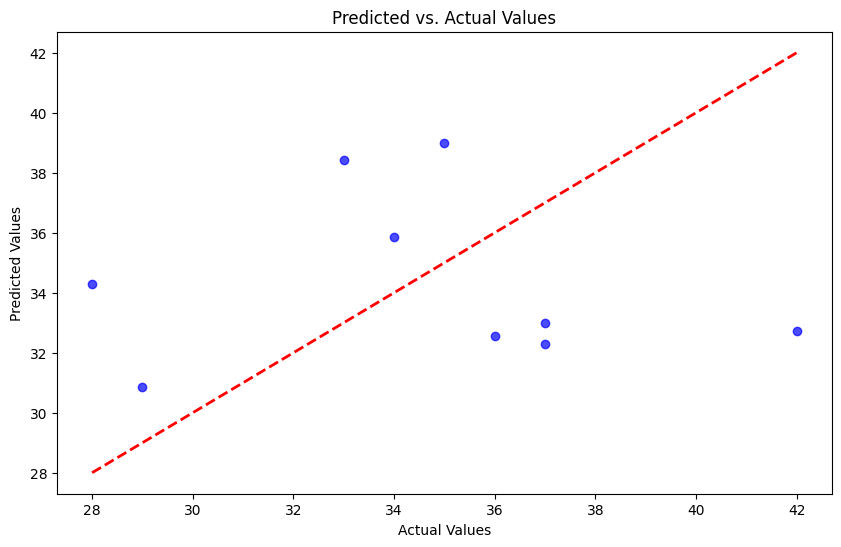

Best Mean Squared Error: 25.34240362811791
R-squared: -0.5598287947397802


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Assuming you have df, features_mrmr, and target defined earlier

target = 'total_wai'

# Split the data into features (X) and target (y)
X = features
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Create the kNN model
k = 7  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = knn_model.predict(X_test_scaled)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Assuming you have already trained the kNN model and made predictions

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

# Calculate permutation feature importances
result = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=50, random_state=42)

# Get the indices of features with positive permutation importance
selected_features_indices = np.where(result.importances_mean > 0)[0]

# Select the features based on indices
selected_features = np.array(features.columns)[selected_features_indices]

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(selected_features)), result.importances_mean[selected_features_indices], align="center")
# plt.yticks(range(len(selected_features)), selected_features)
# plt.xlabel("Permutation Importance")
# plt.title("Permutation Feature Importance (Selected Features)")
# plt.show()

# Calculate the mean squared error of the best predictions
mse_best = mean_squared_error(y_test, y_pred)
print("Best Mean Squared Error:", mse_best)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define a grid of hyperparameters to search
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'polynomial']
}

# Assuming you have X_train_scaled, X_test_scaled, y_train, and y_test defined

# Create a GridSearchCV object
grid_search = GridSearchCV(KernelRidge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_estimator = grid_search.best_estimator_
print("Best Estimator:", best_estimator)

# Apply cross-validation and predict outcomes
cv_predictions = cross_val_predict(best_estimator, X_train_scaled, y_train, cv=5)

# Calculate Mean Absolute Error (MAE)
cv_mae = mean_absolute_error(y_train, cv_predictions)

# Calculate Mean Squared Error (MSE) and R-squared for each fold
cv_mse_scores = mean_squared_error(y_train, cv_predictions)
cv_r2_scores = r2_score(y_train, cv_predictions)

# Calculate the RMSE for each fold from MSE scores
cv_rmse_scores = np.sqrt(cv_mse_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", np.mean(cv_rmse_scores))
print("Standard Deviation of Cross-Validation RMSE:", np.std(cv_rmse_scores))
print("Cross-Validation R-squared Scores:", cv_r2_scores)
print("Mean Cross-Validation R-squared:", np.mean(cv_r2_scores))
print("Cross-Validation MAE:", cv_mae)

# Make predictions on the scaled testing data using the best estimator
y_pred_best = best_estimator.predict(X_test_scaled)

# Calculate the mean squared error of the best predictions
mse_best = mean_squared_error(y_test, y_pred_best)
print("Best Mean Squared Error:", mse_best)

r2 = r2_score(y_test, y_pred_best)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

target_mean = np.mean(y_test)
target_std = np.std(y_test)
cv = target_std / target_mean
print("Coefficient of Variation:", cv)

# Calculate Mean Absolute Error (MAE)
mae_best = mean_absolute_error(y_test, y_pred_best)

# Print MAE
print("Best Mean Absolute Error:", mae_best)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate baseline value (e.g., mean of the outcome variable)
baseline_value = np.mean(outcome_variable)

# Calculate the RMSE of your model
rmse_cv = rmse

# Calculate the standard deviation of the outcome variable
std_outcome = np.std(outcome_variable)

# Calculate the coefficient of variation (CV)
cv_rmse = rmse_cv / std_outcome

# Print the comparison with baseline
print("Baseline Value:", baseline_value)
print("Cross-Validation RMSE:", rmse_cv)
print("Coefficient of Variation (CV):", cv_rmse)



Best Parameters: {'alpha': 0.01, 'kernel': 'polynomial'}
Best Estimator: KernelRidge(alpha=0.01, kernel='polynomial')
Cross-Validation RMSE Scores: 7.997770111816017
Mean Cross-Validation RMSE: 7.997770111816017
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: -0.6716650857107809
Mean Cross-Validation R-squared: -0.6716650857107809
Cross-Validation MAE: 6.854099275192958
Best Mean Squared Error: 2979.9635173087495
R-squared: -182.41720737234704
RMSE: 54.58904209920476
Coefficient of Variation: 0.11664538358338941
Best Mean Absolute Error: 24.783202336997817
Baseline Value: 34.883720930232556
Cross-Validation RMSE: 54.58904209920476
Coefficient of Variation (CV): 9.405733168647943


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate baseline value (e.g., mean of the outcome variable)
baseline_value = np.mean(outcome_variable)

# Calculate the RMSE of your model
rmse_cv = np.sqrt(mean_squared_error(outcome_variable, predicted_values_cv))

# Calculate the standard deviation of the outcome variable
std_outcome = np.std(outcome_variable)

# Calculate the coefficient of variation (CV)
cv_rmse = rmse_cv / std_outcome

# Print the comparison with baseline
print("Baseline Value:", baseline_value)
print("Cross-Validation RMSE:", rmse_cv)
print("Coefficient of Variation (CV):", cv_rmse)


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Split the data into features (X) and target (y)
X = features
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the imputer
imputer = SimpleImputer()

# Apply imputation to scaled training and testing data
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Perform grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Apply cross-validation and predict outcomes
cv_predictions = cross_val_predict(best_estimator, X_train_scaled, y_train, cv=5)

# Calculate Mean Absolute Error (MAE) using cross-validation predictions
cv_mae = mean_absolute_error(y_train, cv_predictions)

# Calculate RMSE for cross-validation predictions
cv_rmse = np.sqrt(mean_squared_error(y_train, cv_predictions))

# Calculate R-squared for cross-validation predictions
cv_r2 = r2_score(y_train, cv_predictions)

# Calculate the coefficient of variation (CV) for cross-validation RMSE
cv_std_rmse = np.std(cv_rmse)
cv_cv_rmse = cv_std_rmse / np.mean(cv_rmse)

# Print the evaluation measures for cross-validation
print("Cross-Validation MAE:", cv_mae)
print("Cross-Validation RMSE:", cv_rmse)
print("Cross-Validation R-squared:", cv_r2)
print("Coefficient of Variation (CV) for Cross-Validation RMSE:", cv_cv_rmse)


Cross-Validation MAE: 4.9607843137254894
Cross-Validation RMSE: 6.316857367451493
Cross-Validation R-squared: -0.042830153343419886
Coefficient of Variation (CV) for Cross-Validation RMSE: 0.0


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate baseline value (e.g., mean of the outcome variable)
baseline_value = np.mean(outcome_variable)

# Calculate the RMSE of your model
rmse_cv = cv_rmse

# Calculate the standard deviation of the outcome variable
std_outcome = np.std(outcome_variable)

# Calculate the coefficient of variation (CV)
cv_rmse = rmse_cv / std_outcome

# Print the comparison with baseline
print("Baseline Value:", baseline_value)
print("Cross-Validation RMSE:", rmse_cv)
print("Coefficient of Variation (CV):", cv_rmse)


Baseline Value: 34.883720930232556
Cross-Validation RMSE: 6.316857367451493
Coefficient of Variation (CV): 1.0883992936656086


## SVM

In [ ]:
import pandas as pd
df = pd.read_csv('/content/12-8_t.csv')

feat_df = pd.read_csv('/content/mrmr_filtered_df_t.csv')
features_mrmr = feat_df[feat_df['Importance'] > 0]["Feature"]


In [ ]:
# Assuming you have a DataFrame called 'df' with the desired columns
bond_columns = ['t2', 't5', 't7','t9']
goal_columns = ['t3', 't4', 't8']
task_columns = ['t1', 't2', 't6', 't10']
all_cols = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_cols].sum(axis=1)

df['total_wai'] = total_wai
df['task_df'] = task_df
df['goal_df'] = goal_df
df['bond_df'] = bond_df

cols = df.columns

columns_to_exclude = ['ppnr', 'session','t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10','bond_df','goal_df'
,'task_df','total_wai']

# Remove specified columns from the DataFrame
cols_cleaned = [col for col in cols if col not in columns_to_exclude]

In [ ]:
df['4'] = 7 - df['4']
df['10'] = 7 - df['10']

bond_columns = ['3', '5', '7','9']
goal_columns = ['1', '4', '8','11']
task_columns = ['2', '6', '10','12']
all_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_columns].sum(axis=1)

df['total_wai'] = total_wai
df['task_df'] = task_df
df['goal_df'] = goal_df
df['bond_df'] = bond_df

cols = df.columns

columns_to_exclude = ['ppnr', 'session','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','bond_df','goal_df'
,'task_df','total_wai']

# Remove specified columns from the DataFrame
cols_cleaned = [col for col in cols if col not in columns_to_exclude]


In [ ]:
# Calculate the column-wise averages
column_averages = df.mean()

# Fill each empty space with the respective column's average value
df.fillna(column_averages, inplace=True)
df.fillna(0, inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Load your data into the 'df' DataFrame and preprocess features as needed

# Create an instance of KBinsDiscretizer with equal frequency binning strategy
n_bins = 2  # Choose the number of bins based on your data and problem
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

# Fit and transform the target variable to create categorical labels
categories = bin_encoder.fit_transform(df[['total_wai']])

# Map bin indices to category labels
category_labels = {0: "low", 1: "high"}

# Convert the bin indices to category labels
category_labels_array = np.vectorize(lambda x: category_labels[x])(categories.flatten())

# Reshape the array to match the shape of the DataFrame
category_labels_array = category_labels_array.reshape(-1, 1)

# Add the category labels to the DataFrame
df['category'] = category_labels_array

# Prepare features and labels
labels = df['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=50)

# Handle missing values in features using an imputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalize the features to have mean of 0 and standard deviation of 1
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_imputed)
X_test_normalized = scaler.transform(X_test_imputed)

# Define a parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create and train the SVM classifier with Grid Search
svm_classifier = SVC(random_state=50)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_normalized, y_train)

# Get the best SVM model from the Grid Search
best_svm_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_classifier.predict(X_test_normalized)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Perform cross-validation to assess model performance using the best estimator
cv_scores = cross_val_score(best_svm_classifier, X_train_normalized, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))

# Get coefficients and feature names for linear SVM
if best_svm_classifier.kernel == 'linear':
    coefficients = best_svm_classifier.coef_[0]
    feature_names = features.columns

    # Print coefficients and their corresponding features
    print("Feature Coefficients:")
    for coef, feature_name in zip(coefficients, feature_names):
        if coef > 0:
          print(f"{feature_name}: {coef}")
else:
    print("Coefficients are only available for linear SVM.")


# Get the best parameters from the Grid Search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


In [ ]:
from sklearn.inspection import permutation_importance

# Assuming you have your best SVM classifier 'best_svm_classifier' and normalized features 'X_test_normalized'
result = permutation_importance(best_svm_classifier, X_test_normalized, y_test, n_repeats=30, random_state=0)

# Print feature importance scores
importances = result.importances_mean
feature_names = features.columns

print("Permutation Feature Importance:")
for importance, feature_name in zip(importances, feature_names):
    if importance > 0:
      print(f"{feature_name}: {importance}")
      # print(feature_name)



Permutation Feature Importance:
min_valence_SPEAKER_00: 0.09166666666666666
approval_score_avg_change: 0.11666666666666667
curiosity_text: 0.08333333333333333
neutral_text: 0.0875
max_valence_SPEAKER_01: 0.08333333333333333
max_arousal_SPEAKER_01: 0.05416666666666667
participation_equality: 0.058333333333333334
fear_score_avg_change: 0.07916666666666666
durationpercentage_therapist_avg_change: 0.0125
neutral_score_avg_change: 0.016666666666666666
nervousness_text: 0.0625
nr_negative_text: 0.029166666666666667
duration_patient: 0.09166666666666666
admiration_score_avg_change: 0.029166666666666667
min_arousal_SPEAKER_01: 0.058333333333333334
max_valence_SPEAKER_00: 0.029166666666666667
speechrate_speaker_therapist_avg_change: 0.075
nr_of_turns_avg_change: 0.07083333333333333
turns_therapist_avg_change: 0.04583333333333333
excitement_score_avg_change: 0.11666666666666667
min_valence_SPEAKER_01: 0.0125
excitement_text: 0.025
min_valence_audio: 0.07083333333333333
arousal_scores_SPEAKER_01_

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Load your data into the 'df' DataFrame and preprocess features as needed

# Create an instance of KBinsDiscretizer with equal frequency binning strategy
n_bins = 2  # Choose the number of bins based on your data and problem
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

# Fit and transform the target variable to create categorical labels
categories = bin_encoder.fit_transform(df[['total_wai']])

# Map bin indices to category labels
category_labels = {0: "low", 1: "high"}

# Convert the bin indices to category labels
category_labels_array = np.vectorize(lambda x: category_labels[x])(categories.flatten())

# Reshape the array to match the shape of the DataFrame
category_labels_array = category_labels_array.reshape(-1, 1)

# Add the category labels to the DataFrame
df['category'] = category_labels_array

# Prepare features and labels
features = df.drop(columns=['total_wai', 'category'])  # Assuming you have 'features' defined
labels = df['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=50)

# Handle missing values in features using an imputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalize the features to have mean of 0 and standard deviation of 1
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_imputed)
X_test_normalized = scaler.transform(X_test_imputed)

# Define a parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create and train the SVM classifier with Grid Search
svm_classifier = SVC(random_state=50)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_normalized, y_train)

# Get the best SVM model from the Grid Search
best_svm_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_classifier.predict(X_test_normalized)


print("observer scores")

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Perform cross-validation to assess model performance using the best estimator
cv_scores = cross_val_score(best_svm_classifier, X_train_normalized, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))


Confusion Matrix:
[[4 0]
 [1 2]]


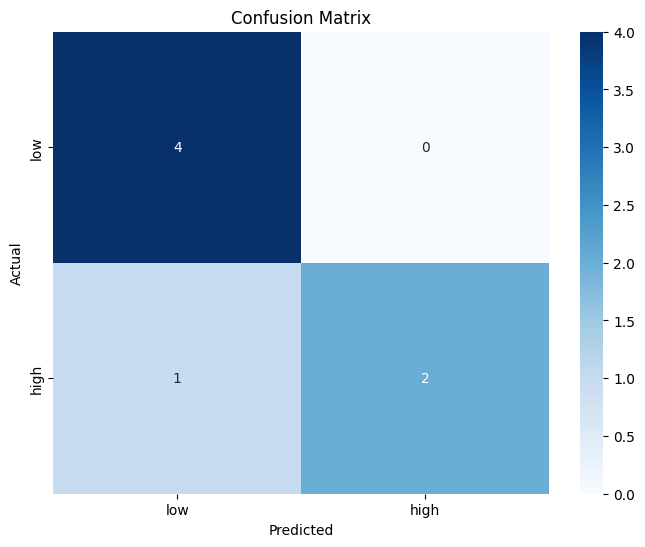

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Print confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=category_labels.values(), yticklabels=category_labels.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the DataFrame df with 'total_wai' as the outcome variable

outcome_variable = df['total_wai']

from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome_variable, test_size=0.3, random_state=42)

# Normalize the features to have mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train_imputed = imputer.fit_transform(X_train_normalized)
X_test_imputed = imputer.transform(X_test_normalized)

# Create an SVM regression model
svm_model = SVR()

# Define the hyperparameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],  # For polynomial kernel
    'gamma': ['scale', 'auto']  # If using rbf or poly kernel
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_imputed, y_train)

# Get the best model from Grid Search
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test_imputed)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Set Mean Absolute Error (MAE):", mae)
print("Test Set MSE:", mse)
print("Test Set R-squared:", r2)
print("Test Set Root Mean Squared Error (RMSE):", np.sqrt(mse))

# Apply cross-validation and predict outcomes
cv_predictions = cross_val_predict(best_svm_model, X_train_imputed, y_train, cv=5)

# Calculate Mean Absolute Error (MAE)
cv_mae = mean_absolute_error(y_train, cv_predictions)

# Calculate Mean Squared Error (MSE) and R-squared for each fold
cv_mse_scores = mean_squared_error(y_train, cv_predictions)
cv_r2_scores = r2_score(y_train, cv_predictions)

# Calculate the RMSE for each fold from MSE scores
cv_rmse_scores = np.sqrt(cv_mse_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", np.mean(cv_rmse_scores))
print("Standard Deviation of Cross-Validation RMSE:", np.std(cv_rmse_scores))
print("Cross-Validation R-squared Scores:", cv_r2_scores)
print("Mean Cross-Validation R-squared:", np.mean(cv_r2_scores))
print("Mean Absolute Error (MAE):", cv_mae)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the DataFrame df with 'total_wai' as the outcome variable

outcome_variable = df['total_wai']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome_variable, test_size=0.2, random_state=42)

# Normalize the features to have mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train_normalized = imputer.fit_transform(X_train_normalized)
X_test_normalized = imputer.transform(X_test_normalized)

# Create an SVM regression model
svm_model = SVR()

# Define the hyperparameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],  # For polynomial kernel
    'gamma': ['scale', 'auto']  # If using rbf or poly kernel
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_normalized, y_train)

# Get the best model from Grid Search
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test_normalized)

# Calculate Mean Squared Error (MSE) and R-squared for your model's predictions
mse_model = mean_squared_error(y_test, y_pred)
r2_model = r2_score(y_test, y_pred)

# Calculate the RMSE for your model's predictions
rmse_model = np.sqrt(mse_model)

# Calculate the RMSE baseline using the mean of the target variable
mean_baseline = np.mean(y_train)  # Using training set's mean for baseline prediction
baseline_predictions = np.full_like(y_test, mean_baseline)
mse_baseline = mean_squared_error(y_test, baseline_predictions)
rmse_baseline = np.sqrt(mse_baseline)

print("Best Parameters:", grid_search.best_params_)
print("Model RMSE:", rmse_model)
print("Baseline RMSE:", rmse_baseline)


# Apply cross-validation and predict outcomes
cv_predictions = cross_val_predict(best_svm_model, X_train_normalized, y_train, cv=5)

# Calculate Mean Absolute Error (MAE)
cv_mae = mean_absolute_error(y_train, cv_predictions)

# Calculate Mean Squared Error (MSE) and R-squared for each fold
cv_mse_scores = mean_squared_error(y_train, cv_predictions)
cv_r2_scores = r2_score(y_train, cv_predictions)

# Calculate the RMSE for each fold from MSE scores
cv_rmse_scores = np.sqrt(cv_mse_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", np.mean(cv_rmse_scores))
print("Standard Deviation of Cross-Validation RMSE:", np.std(cv_rmse_scores))
print("Cross-Validation R-squared Scores:", cv_r2_scores)
print("Mean Cross-Validation R-squared:", np.mean(cv_r2_scores))
print("Mean Absolute Error (MAE):", cv_mae)


import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate baseline value (e.g., mean of the outcome variable)
baseline_value = np.mean(outcome_variable)

# Calculate the RMSE of your model
rmse_cv = np.mean(cv_rmse_scores)

# Calculate the standard deviation of the outcome variable
std_outcome = np.std(outcome_variable)

# Calculate the coefficient of variation (CV)
cv_rmse = rmse_cv / std_outcome

# Print the comparison with baseline
print("Baseline Value:", baseline_value)
print("Cross-Validation RMSE:", rmse_cv)
print("Coefficient of Variation (CV):", cv_rmse)


Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Model RMSE: 9.783278222225343
Baseline RMSE: 4.05205697214364
Cross-Validation RMSE Scores: 5.824540998670881
Mean Cross-Validation RMSE: 5.824540998670881
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: 0.11338545454640492
Mean Cross-Validation R-squared: 0.11338545454640492
Mean Absolute Error (MAE): 4.018588880358291
Baseline Value: 34.883720930232556
Cross-Validation RMSE: 5.824540998670881
Coefficient of Variation (CV): 1.003572811623793


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate baseline value (e.g., mean of the outcome variable)
baseline_value = np.mean(outcome_variable)

# Calculate the RMSE of your model
rmse_cv = rmse_cv

# Calculate the standard deviation of the outcome variable
std_outcome = np.std(outcome_variable)

# Calculate the coefficient of variation (CV)
cv_rmse = rmse_cv / std_outcome

# Print the comparison with baseline
print("Baseline Value:", baseline_value)
print("Cross-Validation RMSE:", rmse_cv)
print("Coefficient of Variation (CV):", cv_rmse)


Baseline Value: 34.883720930232556
Cross-Validation RMSE: 5.824540998670881
Coefficient of Variation (CV): 1.003572811623793


## Elastic Net (Vail model)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you have 'features' and 'outcome_variable' defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome_variable, test_size=0.2, random_state=42)

# Normalize the features to have mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train_normalized = imputer.fit_transform(X_train_normalized)
X_test_normalized = imputer.transform(X_test_normalized)

# Create an Elastic Net regression model
elastic_net_model = ElasticNet()

# Define hyperparameters and their possible values for grid search
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.7, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_normalized, y_train)

# Get the best parameters and estimator from grid search
best_params = grid_search.best_params_
best_elastic_net_model = grid_search.best_estimator_

# Apply cross-validation and predict outcomes
cv_predictions = cross_val_predict(best_elastic_net_model, X_train_normalized, y_train, cv=5)

# Calculate Mean Absolute Error (MAE)
cv_mae = mean_absolute_error(y_train, cv_predictions)

# Calculate Mean Squared Error (MSE) and R-squared for each fold
cv_mse_scores = mean_squared_error(y_train, cv_predictions)
cv_r2_scores = r2_score(y_train, cv_predictions)

# Calculate the RMSE for each fold from MSE scores
cv_rmse_scores = np.sqrt(cv_mse_scores)

print("Best Parameters:", best_params)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", np.mean(cv_rmse_scores))
print("Standard Deviation of Cross-Validation RMSE:", np.std(cv_rmse_scores))
print("Cross-Validation R-squared Scores:", cv_r2_scores)
print("Mean Cross-Validation R-squared:", np.mean(cv_r2_scores))
print("Cross-Validation MAE:", cv_mae)

# Make predictions on the test set using the best model
y_pred_best = best_elastic_net_model.predict(X_test_normalized)

# Calculate Mean Squared Error (MSE) and R-squared for your model's predictions
mse_model = mean_squared_error(y_test, y_pred_best)
r2_model = r2_score(y_test, y_pred_best)

# Calculate the RMSE for your model's predictions
rmse_model = np.sqrt(mse_model)

# Calculate the RMSE baseline using the mean of the target variable
mean_baseline = np.mean(y_train)  # Using training set's mean for baseline prediction
baseline_predictions = np.full_like(y_test, mean_baseline)
mse_baseline = mean_squared_error(y_test, baseline_predictions)
rmse_baseline = np.sqrt(mse_baseline)


import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate baseline value (e.g., mean of the outcome variable)
baseline_value = np.mean(outcome_variable)

# Calculate the RMSE of your model
rmse_cv =np.mean(cv_rmse_scores)

# Calculate the standard deviation of the outcome variable
std_outcome = np.std(outcome_variable)

# Calculate the coefficient of variation (CV)
cv_rmse = rmse_cv / std_outcome

# Print the comparison with baseline
print("Baseline Value:", baseline_value)
print("Cross-Validation RMSE:", rmse_cv)
print("Coefficient of Variation (CV):", cv_rmse)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'alpha': 1, 'l1_ratio': 0.9}
Cross-Validation RMSE Scores: 5.782062088080626
Mean Cross-Validation RMSE: 5.782062088080626
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: 0.12627061829573627
Mean Cross-Validation R-squared: 0.12627061829573627
Cross-Validation MAE: 4.383450221245902
Baseline Value: 34.883720930232556
Cross-Validation RMSE: 5.782062088080626
Coefficient of Variation (CV): 0.9962536632573369


## RF

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer


# Select features

# Prepare outcome variables
outcome_bond = df['total_wai']

# Handle missing values in features using an imputer
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Train the model for bond_df
t_bond = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=1,min_samples_leaf=5)
t_bond.fit(features_imputed, outcome_bond)

# Calculate out-of-bag MSE for bond_df
oob_error_bond = 1 - t_bond.score(features_imputed, outcome_bond)
print("Out-of-Bag MSE for total wai:", oob_error_bond)

# Cross-validation for bond_df
predicted_bond = cross_val_predict(t_bond, features_imputed, outcome_bond, cv=10)
mse_bond = mean_squared_error(outcome_bond, predicted_bond)
print("Cross-validation MSE for total wai:", mse_bond)

# Mean MSE for bond_df
mean_mse_bond = np.mean(mse_bond)
print("Mean MSE for total wai:", mean_mse_bond)


# Calculate R-squared for bond_df
r_squared_bond = t_bond.score(features_imputed, outcome_bond)
print("R-squared for total wai:", r_squared_bond)

# Calculate MAE for bond_df
mae_bond = mean_absolute_error(outcome_bond, predicted_bond)
print("Mean Absolute Error for total wai:", mae_bond)


# Calculate Mean Absolute Error (MAE)
cv_mae = mean_absolute_error(y_train, cv_predictions)

# Calculate Mean Squared Error (MSE) and R-squared for each fold
cv_mse_scores = mean_squared_error(y_train, cv_predictions)
cv_r2_scores = r2_score(y_train, cv_predictions)

# Calculate the RMSE for each fold from MSE scores
cv_rmse_scores = np.sqrt(cv_mse_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", np.mean(cv_rmse_scores))
print("Standard Deviation of Cross-Validation RMSE:", np.std(cv_rmse_scores))
print("Cross-Validation R-squared Scores:", cv_r2_scores)
print("Mean Cross-Validation R-squared:", np.mean(cv_r2_scores))
print("Mean Absolute Error (MAE):", cv_mae)


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define hyperparameter grids for each dataset
param_grid = {
    'n_estimators': [10,20,30,40, 50, 100],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'max_depth': [15, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [ 2, 4,3]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest regressor with GridSearchCV
grid_search_bond = GridSearchCV(RandomForestRegressor(random_state=1), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_bond.fit(features_imputed, outcome_bond)

# Get the best hyperparameters
best_params_bond = grid_search_bond.best_params_
print("Best Hyperparameters:", best_params_bond)

# Train the Random Forest regressor with the best hyperparameters
t_bond = RandomForestRegressor(**best_params_bond, random_state=1)
t_bond.fit(features_imputed, outcome_bond)

# Cross-validation
predicted_bond = cross_val_predict(t_bond, features_imputed, outcome_bond, cv=5)
mse_bond = mean_squared_error(outcome_bond, predicted_bond)
print("Cross-validation MSE:", mse_bond)

# Calculate mean MSE
mean_mse_bond = np.mean(mse_bond)
print("Mean MSE:", mean_mse_bond)

# Calculate R-squared for bond_df
r_squared_bond = t_bond.score(features_imputed, outcome_bond)
print("R-squared for total wai:", r_squared_bond)

# Calculate MAE for bond_df
mae_bond = mean_absolute_error(outcome_bond, predicted_bond)
print("Mean Absolute Error for total wai:", mae_bond)

# Calculate RMSE for out-of-bag predictions
oob_rmse_bond = np.sqrt(mean_mse_bond)
print("Out-of-Bag RMSE:", oob_rmse_bond)


import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate baseline value (e.g., mean of the outcome variable)
baseline_value = np.mean(outcome_variable)

# Calculate the RMSE of your model
rmse_cv = oob_rmse_bond

# Calculate the standard deviation of the outcome variable
std_outcome = np.std(outcome_variable)

# Calculate the coefficient of variation (CV)
cv_rmse = rmse_cv / std_outcome

# Print the comparison with baseline
print("Baseline Value:", baseline_value)
print("Cross-Validation RMSE:", rmse_cv)
print("Coefficient of Variation (CV):", cv_rmse)


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate baseline value (e.g., mean of the outcome variable)
baseline_value = np.mean(outcome_variable)

# Calculate the RMSE of your model
rmse_cv = oob_rmse_bond

# Calculate the standard deviation of the outcome variable
std_outcome = np.std(outcome_variable)

# Calculate the coefficient of variation (CV)
cv_rmse = rmse_cv / std_outcome

# Print the comparison with baseline
print("Baseline Value:", baseline_value)
print("Cross-Validation RMSE:", rmse_cv)
print("Coefficient of Variation (CV):", cv_rmse)


Baseline Value: 34.883720930232556
Cross-Validation RMSE: 6.000026422334306
Coefficient of Variation (CV): 1.0338090826132293


# make figure

In [ ]:
# # spearman feat observer
# multilinear
# Cross-Validation Root Mean Squared Error (RMSE): 24.56246582530362
# Cross-Validation Mean Squared Error (MSE): 603.3147274192081
# Cross-Validation Variance (R-squared): -5.684415163332324
# Cross-Validation Mean Absolute Error (MAE): 13.721659418959858
# Variance of outcome_bond: 90.25692041522491

# xgb
# Mean Cross-Validation RMSE: 15.875150176357469
# Standard Deviation of Cross-Validation RMSE: 9.093089202067036
# Test Set Mean Absolute Error (MAE): 9.054989678519112
# Test Set Mean Squared Error: 132.97907982094435
# Test Set R-squared: -1.038631180673062
# Test Set Root Mean Squared Error (RMSE): 11.531655554210086

# knn
# Best Mean Squared Error: 29.599669697847855
# R-squared: -0.4219449168573963
# RMSE: 5.440557848037998
# Coefficient of Variation: 0.07924922790407601
# MAE: 5.055391058240718

# rf
# Out-of-Bag MSE : 0.6394727478490784
# Cross-validation MSE : 105.90111218814504
# Mean MSE : 105.90111218814504
# R-squared for total wai: 0.36052725215092163
# Mean Absolute Error for total wai: 7.049156872971324

# svm
# Accuracy: 0.2857142857142857
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.29      1.00      0.44         2
#          low       0.00      0.00      0.00         1
#       middle       0.00      0.00      0.00         4

#     accuracy                           0.29         7
#    macro avg       0.10      0.33      0.15         7
# weighted avg       0.08      0.29      0.13         7

# Confusion Matrix:
# [[2 0 0]
#  [1 0 0]
#  [4 0 0]]
# Cross-Validation Scores: [0.16666667 0.33333333 0.2        0.2        0.4       ]
# Mean CV Accuracy: 0.25999999999999995
# Standard Deviation of CV Accuracy: 0.09043106644167025

import pandas as pd

# Create a dictionary to store the data
data = {
    'Model': ['Multilinear', 'XGB', 'kNN', 'RF', 'SVM'],
    'R-squared': [-5.68, -1.04, -0.42, 0.36, None],
    'RMSE': [24.56, 11.53, 5.44, None, None],
    'MSE': [603.31, 132.98, 29.60, 105.90, None],
    'MAE': [13.72, 9.05, 5.06, 7.05, None],
    'Accuracy': [None, None, None, None, 0.29]
}

# Create a DataFrame from the dictionary
results_df_observer_spearman = pd.DataFrame(data)

# Round all values to two decimals
results_df_observer_spearman = results_df_observer_spearman.round(2)

# Display the results DataFrame
print(results_df_observer_spearman)


In [ ]:
# # spearman feat patient
# multilinear
# Cross-Validation Root Mean Squared Error (RMSE): 6.503116556600244
# Cross-Validation Mean Squared Error (MSE): 42.29052494872821
# Cross-Validation Variance (R-squared): -0.2555020813428992
# Cross-Validation Mean Absolute Error (MAE): 4.732569074395098
# Baseline MSE (predicting mean): 33.68415359653867

# xgb
# Mean Cross-Validation RMSE: 8.360643106091455
# Standard Deviation of Cross-Validation RMSE: 2.934993995647956
# Test Set Mean Absolute Error (MAE): 3.974738015068902
# Test Set Mean Squared Error: 34.09113250823631
# Test Set R-squared: -1.7394660051261326
# Test Set Root Mean Squared Error (RMSE): 5.838761213496944

# knn
# Best Mean Squared Error: 22.53134951935006
# R-squared: -0.3868079871332484
# RMSE: 4.746719869483564
# Coefficient of Variation: 0.11664538358338941
# Best Mean Absolute Error: 4.2689197042852465

# rf
# Out-of-Bag MSE : 0.33862314112794034
# Cross-validation MSE : 33.72211582422947
# Mean MSE : 33.72211582422947
# R-squared for total wai: 0.6613768588720597
# Mean Absolute Error for total wai: 4.585895733868312

# svm
# Accuracy: 0.3333333333333333
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.43      1.00      0.60         3
#          low       0.00      0.00      0.00         4
#       middle       0.00      0.00      0.00         2

#     accuracy                           0.33         9
#    macro avg       0.14      0.33      0.20         9
# weighted avg       0.14      0.33      0.20         9

# Confusion Matrix:
# [[3 0 0]
#  [4 0 0]
#  [0 2 0]]
# Cross-Validation Scores: [0.42857143 0.57142857 0.42857143 0.57142857 0.5       ]
# Mean CV Accuracy: 0.5
# Standard Deviation of CV Accuracy: 0.06388765649999398

import pandas as pd

# Create a dictionary to store the data
data = {
    'Model': ['Multilinear', 'XGB', 'kNN', 'RF', 'SVM'],
    'R-squared': [-0.26, -1.74, -0.39, 0.66, None],
    'RMSE': [6.50, 5.84, 4.75, None, None],
    'MSE': [42.29, 34.09, 22.53, 33.72, None],
    'MAE': [4.73, 3.97, 4.27, 4.59, None],
    'Accuracy': [None, None, None, None, 0.33]
}

# Create a DataFrame from the dictionary
results_df_patient_spearman = pd.DataFrame(data)

# Round all values to two decimals
results_df_patient_spearman = results_df_patient_spearman.round(2)

# Display the results DataFrame
print(results_df_patient_spearman)


In [ ]:
# # spearman feat therapist
# multilinear
# Cross-Validation Root Mean Squared Error (RMSE): 20.545250479639535
# Cross-Validation Mean Squared Error (MSE): 422.1073172711285
# Cross-Validation Variance (R-squared): -30.803242561594654
# Cross-Validation Mean Absolute Error (MAE): 7.124531506468517
# Variance of outcome_bond: 13.272461650840029

# xgb
# Mean Cross-Validation RMSE: 4.722142995205573
# Standard Deviation of Cross-Validation RMSE: 1.1267014946441982
# Test Set Mean Absolute Error (MAE): 2.594385274251302
# Test Set Mean Squared Error: 11.04399370507211
# Test Set R-squared: 0.3008163805173819
# Test Set Root Mean Squared Error (RMSE): 3.3232504728160515

# knn
# Best Mean Squared Error: 14.995867768595039
# R-squared: -0.3348199404590855
# RMSE: 3.8724498406816115
# Coefficient of Variation: 0.10682938388678823
# MAE: 3.1818181818181817

# rf
# Out-of-Bag MSE : 0.575649279739359
# Cross-validation MSE : 15.288623106940868
# Mean MSE : 15.288623106940868
# R-squared for total wai: 0.424350720260641
# Mean Absolute Error for total wai: 3.243494546656314

# svm
# Accuracy: 0.375
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.33      0.33      0.33         3
#          low       0.00      0.00      0.00         1
#       middle       0.40      0.50      0.44         4

#     accuracy                           0.38         8
#    macro avg       0.24      0.28      0.26         8
# weighted avg       0.33      0.38      0.35         8

# Confusion Matrix:
# [[1 0 2]
#  [0 0 1]
#  [2 0 2]]
# Cross-Validation Scores: [0.5        0.5        0.16666667 0.66666667 0.4       ]
# Mean CV Accuracy: 0.44666666666666666
# Standard Deviation of CV Accuracy: 0.1641137816678823

import pandas as pd

# Create a dictionary to store the data
data = {
    'Model': ['Multilinear', 'XGB', 'kNN', 'RF', 'SVM'],
    'R-squared': [-30.80, 0.30, -0.33, 0.42, None],
    'RMSE': [20.55, 3.32, 3.87, None, None],
    'MSE': [422.11, 11.04, 14.99, 15.29, None],
    'MAE': [7.12, 2.59, 3.18, 3.24, None],
    'Accuracy': [None, None, None, None, 0.38],
}

# Create a DataFrame from the dictionary
results_df_therapist_spearman = pd.DataFrame(data)

# Round all values to two decimals
results_df_therapist_spearman = results_df_therapist_spearman.round(2)

# Display the results DataFrame
print(results_df_therapist_spearman)


In [ ]:
# # no feat selection therapist
# multilinear
# Cross-Validation Root Mean Squared Error (RMSE): 5.2011903176943495
# Cross-Validation Mean Squared Error (MSE): 27.05238072087745
# Cross-Validation Variance (R-squared): -1.0382338583864188
# Cross-Validation Mean Absolute Error (MAE): 4.406321733993321
# Variance of outcome_bond: 13.272461650840029

# xgb
# Mean Cross-Validation RMSE: 3.9066235160502307
# Standard Deviation of Cross-Validation RMSE: 1.5622777642046872
# Test Set Mean Absolute Error (MAE): 3.9214269002278646
# Test Set Mean Squared Error: 24.47637501116066
# Test Set R-squared: -0.5495735446007732
# Test Set Root Mean Squared Error (RMSE): 4.947360408456277

# knn
# Best Mean Squared Error: 14.89772727272727
# R-squared: -0.3260842078644579
# RMSE: 3.859757411124081
# Coefficient of Variation: 0.10682938388678823
# MAE: 3.170454545454545

# rf
# Cross-validation MSE : 15.650340590070368
# Mean MSE : 15.650340590070368
# R-squared for total wai: 0.4714938822915048
# Mean Absolute Error for total wai: 3.2463316669307347

# svm
# Accuracy: 0.5
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.33      0.33      0.33         3
#          low       0.00      0.00      0.00         1
#       middle       0.60      0.75      0.67         4

#     accuracy                           0.50         8
#    macro avg       0.31      0.36      0.33         8
# weighted avg       0.42      0.50      0.46         8

# Confusion Matrix:
# [[1 0 2]
#  [1 0 0]
#  [1 0 3]]
# Cross-Validation Scores: [0.5        0.5        0.5        0.66666667 0.4       ]
# Mean CV Accuracy: 0.5133333333333333

import pandas as pd

# Create a dictionary to store the data
data = {
    'Model': ['Multilinear', 'XGB', 'kNN', 'RF', 'SVM'],
    'R-squared': [-1.04, -0.55, -0.33, 0.47, None],
    'RMSE': [5.20, 4.95, 3.86, None, None],
    'MSE': [27.05, 24.48, 14.90, 15.65, None],
    'MAE': [4.41, 3.92, 3.17, 3.25, None],
    'Accuracy': [None, None, None, None, 0.50],
}

# Create a DataFrame from the dictionary
results_df_therapist_no_feat_sel = pd.DataFrame(data)

# Round all values to two decimals
results_df_therapist_no_feat_sel = results_df_therapist_no_feat_sel.round(2)

# Display the results DataFrame
print(results_df_therapist_no_feat_sel)


         Model  R-squared  RMSE    MSE   MAE  Accuracy
0  Multilinear      -1.04  5.20  27.05  4.41       NaN
1          XGB      -0.55  4.95  24.48  3.92       NaN
2          kNN      -0.33  3.86  14.90  3.17       NaN
3           RF       0.47   NaN  15.65  3.25       NaN
4          SVM        NaN   NaN    NaN   NaN       0.5


In [ ]:
# # no feat selection pat
# multilinear
# Cross-Validation Root Mean Squared Error (RMSE): 9.576373771321329
# Cross-Validation Mean Squared Error (MSE): 91.70693460805109
# Cross-Validation Variance (R-squared): -1.7225542225729176
# Cross-Validation Mean Absolute Error (MAE): 7.1227799299742935

# xgb
# Mean Cross-Validation RMSE: 11.062972164392365
# Standard Deviation of Cross-Validation RMSE: 2.4559313060635737
# Test Set Mean Absolute Error (MAE): 5.3903961181640625
# Test Set Mean Squared Error: 45.195978862161105
# Test Set R-squared: -2.631819729995089
# Test Set Root Mean Squared Error (RMSE): 6.7227954648465325

# knn
# Best Mean Squared Error: 22.993572084481187
# R-squared: -0.41525785626365974
# RMSE: 4.795161319964239
# Coefficient of Variation: 0.11664538358338941
# MAE: 4.141414141414142
# Baseline MSE (predicting mean): 33.68415359653867

# rf
# Cross-validation MSE : 33.71960767355325
# Mean MSE : 33.71960767355325
# R-squared for total wai: 0.4516542725706556
# Mean Absolute Error for total wai: 4.2870932238396255

# svm
# Accuracy: 0.4444444444444444
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.38      1.00      0.55         3
#          low       0.00      0.00      0.00         4
#       middle       1.00      0.50      0.67         2

#     accuracy                           0.44         9
#    macro avg       0.46      0.50      0.40         9
# weighted avg       0.35      0.44      0.33         9

# Confusion Matrix:
# [[3 0 0]
#  [4 0 0]
#  [1 0 1]]
# Cross-Validation Scores: [0.42857143 0.28571429 0.42857143 0.42857143 0.5       ]
# Mean CV Accuracy: 0.41428571428571426
# Standard Deviation of CV Accuracy: 0.06998542122237651

import pandas as pd

# Create a dictionary to store the data
data = {
    'Model': ['Multilinear', 'XGB', 'kNN', 'RF', 'SVM'],
    'R-squared': [-1.72, -2.63, -0.42, 0.45, None],
    'RMSE': [9.58, 6.72, 4.80, None, None],
    'MSE': [91.71, 45.20, 22.99, 33.72, None],
    'MAE': [7.12, 5.39, 4.14, 4.29, None],
    'Accuracy': [None, None, None, None, 0.44],
}

# Create a DataFrame from the dictionary
results_df_patient_no_feat_sel = pd.DataFrame(data)

# Round all values to two decimals
results_df_patient_no_feat_sel = results_df_patient_no_feat_sel.round(2)

# Display the results DataFrame
print(results_df_patient_no_feat_sel)


In [ ]:
# # no feat selection observer
# multilinear
# Cross-Validation Root Mean Squared Error (RMSE): 9.549544174396987
# Cross-Validation Mean Squared Error (MSE): 91.19379393875941
# Cross-Validation Variance (R-squared): -1.1954729740134926
# Cross-Validation Mean Absolute Error (MAE): 7.376198596315359

# xgb
# Mean Cross-Validation RMSE: 9.146473985244327
# Standard Deviation of Cross-Validation RMSE: 4.608912548589462
# Test Set Mean Absolute Error (MAE): 9.01233332497733
# Test Set Mean Squared Error: 128.80897338038864
# Test Set R-squared: -4.258604203823406
# Test Set Root Mean Squared Error (RMSE): 11.349404098030373

# knn
# Best Mean Squared Error: 23.87926943574382
# R-squared: -0.39962225161656373
# RMSE: 4.886641938565155
# Coefficient of Variation: 0.0873524609957762
# MAE: 3.7223656677367143

# rf
# Out-of-Bag MSE for total wai: 0.6502227914975253
# Cross-validation MSE for total wai: 49.89275394400244
# Mean MSE for total wai: 49.89275394400244
# R-squared for total wai: 0.34977720850247473
# MAE: 5.755102040816325

# variance=41.5

# svm observer
# Accuracy: 0.2857142857142857
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.29      1.00      0.44         2
#          low       0.00      0.00      0.00         2
#       middle       0.00      0.00      0.00         3

#     accuracy                           0.29         7
#    macro avg       0.10      0.33      0.15         7
# weighted avg       0.08      0.29      0.13         7

# Confusion Matrix:
# [[2 0 0]
#  [2 0 0]
#  [3 0 0]]
# Cross-Validation Scores: [0.33333333 0.33333333 0.2        0.2        0.6       ]
# Mean CV Accuracy: 0.3333333333333333
# Standard Deviation of CV Accuracy: 0.1460593486680443

import pandas as pd

# Create a dictionary to store the data
data = {
    'Model': ['Multilinear', 'XGB', 'kNN', 'RF', 'SVM'],
    'R-squared': [-1.20, -4.26, -0.40, 0.35, None],
    'RMSE': [9.55, 11.35, 4.89, None, None],
    'MSE': [91.19, 128.81, 23.88, 49.89, None],
    'MAE': [7.38, 9.01, 3.72, 5.76, None],
    'Accuracy': [None, None, None, None, 0.33]
}

# Create a DataFrame from the dictionary
results_df_observer_no_feat_sel = pd.DataFrame(data)

# Round all values to two decimals
results_df_observer_no_feat_sel = results_df_observer_no_feat_sel.round(2)

# Display the results DataFrame
print(results_df_observer_no_feat_sel)


In [ ]:
# mrmr feat selection therapist
# multilinear
# Cross-Validation Root Mean Squared Error (RMSE): 7.3417753346724846
# Cross-Validation Mean Squared Error (MSE): 53.90166506480528
# Cross-Validation Variance (R-squared): -3.0611656287131765
# Cross-Validation Mean Absolute Error (MAE): 6.2259671070085005


# therapist
# multilinear: 53.90
# xgb: 27.33
# knn: 14.52
# rf: 15.75
# variance: 13.27


# xgb
# th Variance of outcome_bond: 13.272461650840029

# Mean Cross-Validation RMSE: 4.079047804245485
# Standard Deviation of Cross-Validation RMSE: 1.6792133060501706
# Test Set Mean Absolute Error (MAE): 3.9975870768229167
# Test Set Mean Squared Error: 27.328801825279758
# Test Set R-squared: -0.7301576844929503
# Test Set Root Mean Squared Error (RMSE): 5.227695651554302

# knn
# Best Mean Squared Error: 14.521604938271597
# R-squared: -0.29260461202973875
# RMSE: 3.810722364365003
# Coefficient of Variation: 0.10682938388678823
# Best Mean Absolute Error: 2.888888888888889

# rf
# Cross-validation MSE : 15.747748709726954
# Mean MSE : 15.747748709726954
# R-squared for total wai: 0.4279206014918464
# Out-of-Bag MSE : 0.5720793985081536

# svm therapist
# Accuracy: 0.75
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.71      1.00      0.83         5
#          low       1.00      0.33      0.50         3

#     accuracy                           0.75         8
#    macro avg       0.86      0.67      0.67         8
# weighted avg       0.82      0.75      0.71         8

# Confusion Matrix:
# [[5 0]
#  [2 1]]
# Cross-Validation Scores: [0.83333333 1.         1.         0.83333333 1.        ]
# Mean CV Accuracy: 0.9333333333333333
# Standard Deviation of CV Accuracy: 0.08164965809277258

import pandas as pd

# Create a dictionary to store the data
data = {
    'Model': ['Multilinear', 'XGB', 'kNN', 'RF', 'SVM'],
    'MSE': [53.90, 27.33, 14.52, 15.75, None],
    'MAE': [6.23, 4.00, 2.89, None, None],
    'Accuracy': [None, None, None, None, 0.45],
    'RMSE': [7.34, 4.08, 4.08, 3.96, None],
    'R-squared': [-3.07, -0.73, -0.29, 0.43, 0.45],

}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(data)

# Round all values to two decimals
results_df = results_df.round(2)

# Display the results DataFrame
print(results_df)


In [ ]:
# # mrmr feat selection patient
# multilinear
# Cross-Validation Root Mean Squared Error (RMSE): 11.915739138367345
# Cross-Validation Mean Squared Error (MSE): 141.98483921361935
# Cross-Validation Variance (R-squared): -3.2151820382451133
# Cross-Validation Mean Absolute Error (MAE): 8.168230784060256
# pat Variance of outcome_bond: 33.68415359653867


# patient
# multilinear: 141.98
# xgb: 19.69
# knn: 23.21
# rf: 34.50
# variance: 33.68



# xgb
# Mean Cross-Validation RMSE: 11.478237511652486
# Standard Deviation of Cross-Validation RMSE: 2.769165890057599
# Test Set Mean Absolute Error (MAE): 3.5184718237982855
# Test Set Mean Squared Error: 19.687778402841406
# Test Set R-squared: -0.5820536216568988
# Test Set Root Mean Squared Error (RMSE): 4.437091209659928

# knn
# R-squared: -0.428486997635934
# RMSE: 4.817520607231213
# Coefficient of Variation: 0.11664538358338941
# Best Mean Absolute Error: 4.234567901234568
# Best Mean Squared Error: 23.208504801097398

# rf
# Out-of-Bag MSE for total wai: 0.4713067978565091
# Cross-validation MSE for total wai: 34.50240269723622
# Mean MSE for total wai: 34.50240269723622
# R-squared for total wai: 0.5286932021434909


# svm
# Mean CV Accuracy: 0.7857142857142858
# Standard Deviation of CV Accuracy: 0.19166296949998196
# Cross-Validation Mean Squared Error (MSE): 0.20588235294117646
# Cross-Validation Root Mean Squared Error (RMSE): 0.45374260648651504
# Cross-Validation R-squared: 0.17361111111111116


# Accuracy: 0.4444444444444444
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.43      1.00      0.60         3
#          low       0.00      0.00      0.00         4
#       middle       0.50      0.50      0.50         2

#     accuracy                           0.44         9
#    macro avg       0.31      0.50      0.37         9
# weighted avg       0.25      0.44      0.31         9

# Confusion Matrix:
# [[3 0 0]
#  [3 0 1]
#  [1 0 1]]
# Cross-Validation Scores: [0.42857143 0.28571429 0.42857143 0.42857143 0.5       ]
# Mean CV Accuracy: 0.41428571428571426
# Standard Deviation of CV Accuracy: 0.06998542122237651

import pandas as pd

# Create a dictionary to store the data
data = {
    'Model': ['Multilinear', 'XGB', 'kNN', 'RF', 'SVM'],
    'R-squared': [-3.22, -0.58, -0.43, 0.53, None],
    'RMSE': [11.92, 4.44, 4.82, None, None],
    'MSE': [141.98, 19.69, 23.21, 34.50, None],
    'MAE': [8.17, 3.52, 4.23, None, None],
    'Accuracy': [None, None, None, None, 0.41]
}

# Create a DataFrame from the dictionary
results_df_patient = pd.DataFrame(data)

# Round all values to two decimals
results_df_patient = results_df_patient.round(2)

# Display the results DataFrame
print(results_df_patient)


In [ ]:
# # mrmr feat selection observer

# multilinear
# Cross-Validation Root Mean Squared Error (RMSE): 12.843390492135098
# Cross-Validation Mean Squared Error (MSE): 164.95267933346622
# Cross-Validation Variance (R-squared): -0.8275903783843408
# Cross-Validation Mean Absolute Error (MAE): 9.330616306284092
# Variance of outcome_bond: 90.25692041522491

# observer
# multilinear: 164.95
# xgb: 77.31
# knn: 36.01
# rf: 110.09
# variance: 90.26


# xgb
# Cross-Validation RMSE: [22.86705547 15.83443159  3.99682853  5.3993472   5.14931288]
# Mean Cross-Validation RMSE: 10.649395131605697
# Standard Deviation of Cross-Validation RMSE: 7.459576095228801
# Test Set Mean Absolute Error (MAE): 7.226904460362026
# Test Set Mean Squared Error: 77.310323592819
# Test Set R-squared: -0.18520324006198874
# Test Set Root Mean Squared Error (RMSE): 8.79262893523996
# Variance of outcome_bond: 90.25692041522491
# Baseline MSE (predicting mean): 90.25692041522491

# knn
# R-squared: -0.7297520661157015
# RMSE: 6.000590289735306
# Coefficient of Variation: 0.07924922790407601
# Best Mean Absolute Error: 4.649350649350651
# Best Mean Squared Error: 36.00708382526564

# rf
# Out-of-Bag MSE for total wai: 0.6760513291986885
# Cross-validation MSE for total wai: 110.08253906601789
# Mean MSE for total wai: 110.08253906601789
# R-squared for total wai: 0.3239486708013115
# Variance of outcome_bond: 90.25692041522491

# svm
# Accuracy: 0.8571428571428571
# Classification Report:
#               precision    recall  f1-score   support

#         high       0.80      1.00      0.89         4
#          low       1.00      0.67      0.80         3

#     accuracy                           0.86         7
#    macro avg       0.90      0.83      0.84         7
# weighted avg       0.89      0.86      0.85         7

# Confusion Matrix:
# [[4 0]
#  [1 2]]
# Cross-Validation Scores: [1.         0.83333333 1.         1.         0.8       ]
# Mean CV Accuracy: 0.9266666666666667
# Standard Deviation of CV Accuracy: 0.09043106644167022

import pandas as pd

# Create a dictionary to store the data
data = {
    'Model': ['Multilinear', 'XGB', 'kNN', 'RF', 'SVM'],
    'R-squared': [-0.83, -0.19, -0.73, 0.32, None],
    'RMSE': [12.84, 8.79, 6.00, None, None],
    'MSE': [164.95, 77.31, 36.01, 110.08, None],
    'MAE': [9.33, 7.23, 4.65, None, None],
    'Cross-Val Accuracy': [None, None, None, None, 0.37]
}

# Create a DataFrame from the dictionary
results_df_observer = pd.DataFrame(data)

# Round all values to two decimals
results_df_observer = results_df_observer.round(2)

# Display the results DataFrame
print(results_df_observer)


         Model  R-squared   RMSE     MSE   MAE  Cross-Val Accuracy
0  Multilinear      -0.83  12.84  164.95  9.33                 NaN
1          XGB      -0.19   8.79   77.31  7.23                 NaN
2          kNN      -0.73   6.00   36.01  4.65                 NaN
3           RF       0.32    NaN  110.08   NaN                 NaN
4          SVM        NaN    NaN     NaN   NaN                0.37


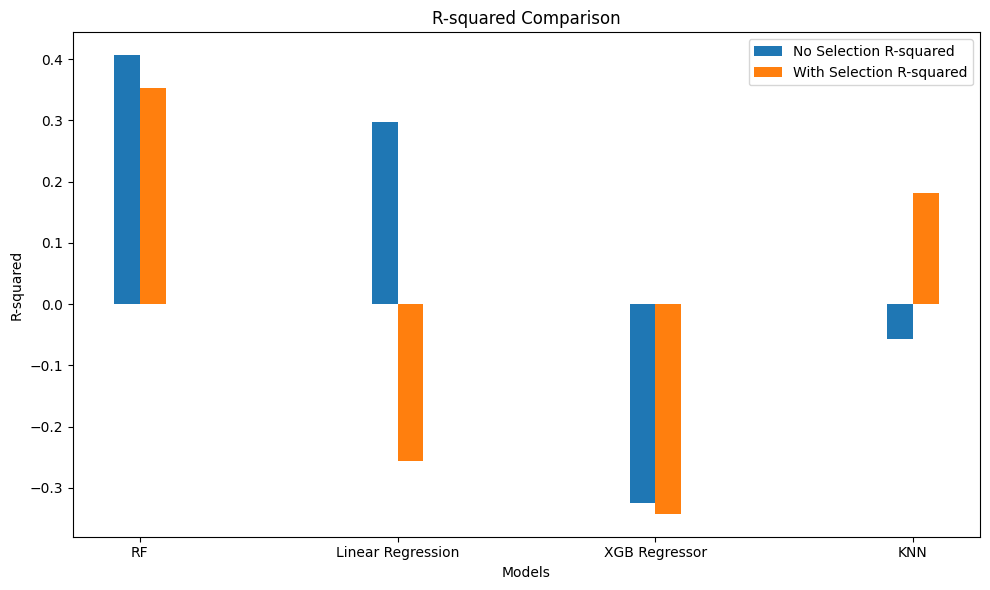

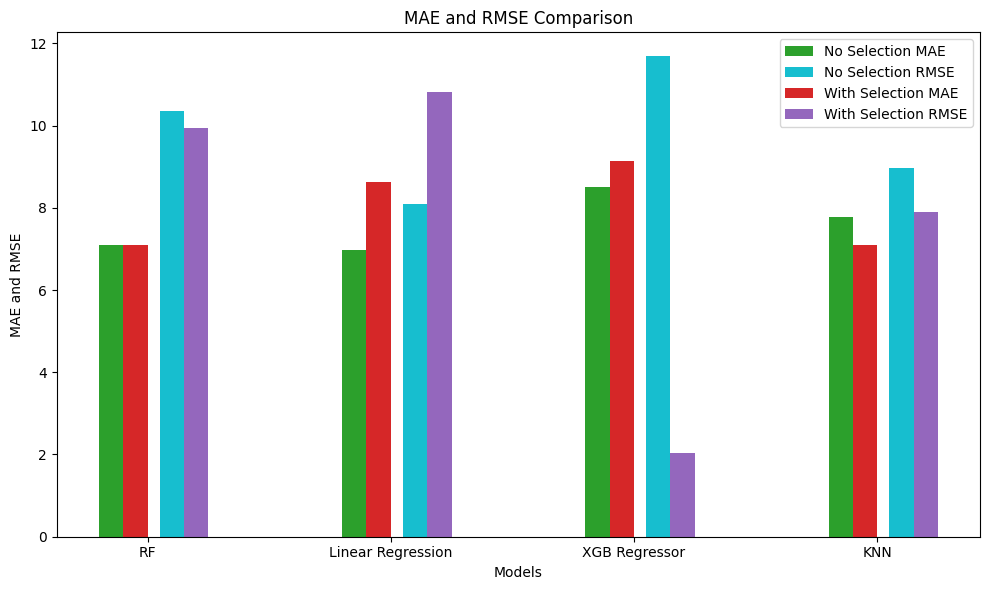

In [ ]:

import matplotlib.pyplot as plt
import numpy as np



# Define model names
model_names = ['RF', 'Linear Regression', 'XGB Regressor', 'KNN']

# Define metric values for each model and location
metrics = {
    'RF': {
        'No Selection': {
            'MAE': 7.100354223477794,
            'RMSE': 10.361359928884475,
            'R-squared': 0.406390658388043,
        },
        'With Feature Selection': {
            'MAE': 7.100354223477794,
            'RMSE': 9.931347944709854,
            'R-squared': 0.3534782497450307,
        }
    },
    'Linear Regression': {
        'No Selection': {
            'MAE': 6.98118275268871,
            'RMSE': 8.094725165442517,
            'R-squared': 0.29731238684419303,
        },
        'With Feature Selection': {
            'MAE': 8.628185339249287,
            'RMSE': 10.821464336498229,
            'R-squared': -0.25582795662840363,
        }
    },
    'XGB Regressor': {
        'No Selection': {
            'MAE': 8.516047636667887,
            'RMSE': 11.683654540267694,
            'R-squared': -0.32434743245867126,
        },
        'With Feature Selection': {
            'MAE': 9.127379099527994,
            'RMSE': 2.047543439179606,
            'R-squared': -0.3421497569778922,
        }
    },
    'KNN': {
        'No Selection': {
            'MAE': 7.787878787878789,
            'RMSE': 8.972563014676552,
            'R-squared': -0.05621280389369443,
        },
        'With Feature Selection': {
            'MAE': 7.100354223477794,
            'RMSE': 7.901105741040897,
            'R-squared': 0.18098068895045938,
        }
    }
}

# Extract metric names and values
metric_names = ['MAE', 'RMSE', 'R-squared']

# Create positions for the bars
num_models = len(model_names)
bar_width = 0.1
bar_shift = 0.1  # Adjust this value to control the spacing between bars
locations = np.arange(num_models)
locations_with_selection = locations + bar_width

# Create positions for the bars
num_models = len(model_names)
bar_width = 0.1
locations = np.arange(num_models)
locations_with_selection = locations + bar_width

# Plot R-squared values
plt.figure(figsize=(10, 6))
plt.bar(locations, [metrics[model]['No Selection']['R-squared'] for model in model_names], width=bar_width, label='No Selection R-squared', align='center', color='tab:blue')
plt.bar(locations_with_selection, [metrics[model]['With Selection']['R-squared'] for model in model_names], width=bar_width, label='With Selection R-squared', align='center', color='tab:orange')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison')
plt.xticks(locations + bar_width / 2, model_names)
plt.legend()
plt.tight_layout()
plt.show()

# Plot MAE and RMSE values
plt.figure(figsize=(10, 6))
plt.bar(locations - bar_width/2 - bar_shift, [metrics[model]['No Selection']['MAE'] for model in model_names], width=bar_width, label='No Selection MAE', align='center', color='tab:green')
plt.bar(locations - bar_width/2 + bar_shift, [metrics[model]['No Selection']['RMSE'] for model in model_names], width=bar_width, label='No Selection RMSE', align='edge', color='tab:cyan')
plt.bar(locations + bar_width/2 - bar_shift, [metrics[model]['With Selection']['MAE'] for model in model_names], width=bar_width, label='With Selection MAE', align='center', color='tab:red')
plt.bar(locations + bar_width/2 + bar_shift, [metrics[model]['With Selection']['RMSE'] for model in model_names], width=bar_width, label='With Selection RMSE', align='edge', color='tab:purple')
plt.xlabel('Models')
plt.ylabel('MAE and RMSE')
plt.title('MAE and RMSE Comparison')
plt.xticks(locations, model_names)
plt.legend()
plt.tight_layout()
plt.show()







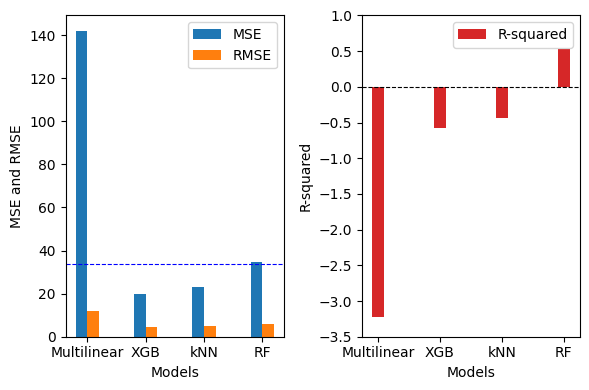

In [ ]:
# patient

import matplotlib.pyplot as plt
import numpy as np



# patient
# multilinear: 141.98
# xgb: 19.69
# knn: 23.21
# rf: 34.50
# variance: 33.68



# Define model names
model_names = ['Multilinear', 'XGB', 'kNN', 'RF']

# Define metric values for each model
metrics = {
    'Multilinear': {
        'RMSE': 11.92,
        'R-squared': -3.22,
        'MSE': 141.98,
    },
    'XGB': {
        'RMSE': 4.44,
        'R-squared': -0.58,
        'MSE': 19.69,
    },
    'kNN': {
        'RMSE': 4.81,
        'R-squared': -0.43,
        'MSE': 23.21,
    },
    'RF': {
        'RMSE': 5.92,
        'R-squared': 0.53,
        'MSE': 34.50,
    }
}


# Create positions for the bars
num_models = len(model_names)
bar_width = 0.2
locations = np.arange(num_models)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

# Plot MAE and RMSE values
for i, metric in enumerate(['MSE', 'RMSE']):
    ax1.bar(locations + (i - 0.5) * bar_width, [metrics[model][metric] for model in model_names], width=bar_width, label=metric, align='center')

ax1.axhline(y=33.68, color='blue', linewidth=0.8, linestyle='--')
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE and RMSE')
ax1.set_xticks(locations)
ax1.set_xticklabels(model_names)
ax1.legend()

# Plot R-squared values
r_squared_values = [metrics[model]['R-squared'] for model in model_names]
ax2.bar(locations, r_squared_values, width=bar_width, label='R-squared', align='center', color='tab:red')
ax2.set_ylim(-3.5, 1)
ax2.set_xlabel('Models')
ax2.set_ylabel('R-squared')
ax2.set_xticks(locations)
ax2.set_xticklabels(model_names)
ax2.legend()
y_limit = (-5, 1)
ax2.axhline(y=0, color='black', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.savefig("model_comparison_patient.pdf", format='pdf')
plt.show()


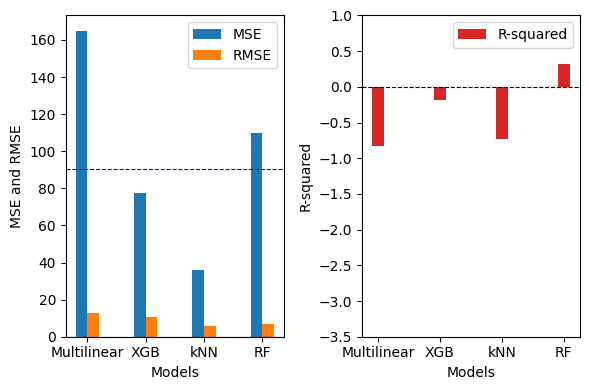

In [ ]:
# observer
import matplotlib.pyplot as plt
import numpy as np

# observer
# multilinear: 164.95
# xgb: 77.31
# knn: 36.01
# rf: 110.09
# variance: 90.26


# Define model names
model_names = ['Multilinear', 'XGB', 'kNN', 'RF']

# Define metric values for each model
metrics = {
    'Multilinear': {
        'RMSE': 12.84,
        'R-squared': -0.83,
        'MSE': 164.95,
    },
    'XGB': {
        'RMSE': 10.65,
        'R-squared': -0.19,
        'MSE': 77.31,
    },
    'kNN': {
        'RMSE': 6.00,
        'R-squared': -0.73,
        'MSE': 36.01,
    },
    'RF': {
        'RMSE': 7.02,
        'R-squared': 0.32,
        'MSE':110.09,
    }
}

# Create positions for the bars
num_models = len(model_names)
bar_width = 0.2
locations = np.arange(num_models)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,4))

# Plot MAE and RMSE values
for i, metric in enumerate(['MSE', 'RMSE']):
    ax1.bar(locations + (i - 0.5) * bar_width, [metrics[model][metric] for model in model_names], width=bar_width, label=metric, align='center')
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE and RMSE')
ax1.set_xticks(locations)
ax1.set_xticklabels(model_names)
ax1.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
ax1.axhline(y=90.26, color='blue', linewidth=0.8, linestyle='--')  # Adding the horizontal line at y=0
ax1.legend()

# Plot R-squared values
r_squared_values = [metrics[model]['R-squared'] for model in model_names]
ax2.bar(locations, r_squared_values, width=bar_width, label='R-squared', align='center', color='tab:red')
ax2.set_ylim(-3.5, 1)

ax2.set_xlabel('Models')
ax2.set_ylabel('R-squared')
ax2.set_xticks(locations)
ax2.set_xticklabels(model_names)
ax2.axhline(y=0, color='black', linewidth=0.8, linestyle='--')  # Adding the horizontal line at y=0
ax2.legend()

plt.tight_layout()
plt.savefig("model_comparison_observer.pdf", format='pdf')
plt.show()


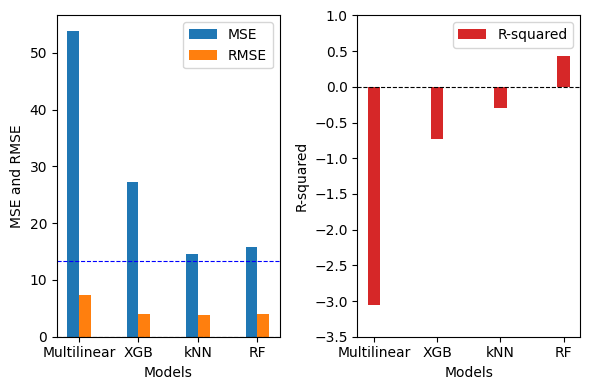

In [ ]:
# therapist
import matplotlib.pyplot as plt
import numpy as np


# therapist
# multilinear: 53.90
# xgb: 27.33
# knn: 14.52
# rf: 15.75
# variance: 13.27

# Define model names
model_names = ['Multilinear', 'XGB', 'kNN', 'RF']

# Define metric values for each model
metrics = {
    'Multilinear': {
        'RMSE': 7.34,
        'R-squared': -3.06,
        'MSE': 53.90,
    },
    'XGB': {
        'RMSE': 4.08,
        'R-squared': -0.73,
        'MSE': 27.33,
    },
    'kNN': {
        'RMSE': 3.81,
        'R-squared': -0.29,
        'MSE': 14.52,
    },
    'RF': {
        'RMSE': 4.01,
        'R-squared': 0.43,
        'MSE': 15.75,
    }
}

# Create positions for the bars
num_models = len(model_names)
bar_width = 0.2
locations = np.arange(num_models)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,4))

# Plot MAE and RMSE values
for i, metric in enumerate(['MSE', 'RMSE']):
    ax1.bar(locations + (i - 0.5) * bar_width, [metrics[model][metric] for model in model_names], width=bar_width, label=metric, align='center')

ax1.axhline(y=13.27, color='blue', linewidth=0.8, linestyle='--')
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE and RMSE')
ax1.set_xticks(locations)
ax1.set_xticklabels(model_names)
ax1.axhline(y=0, color='black', linewidth=0.8, linestyle='--')  # Adding the horizontal line at y=0
ax1.legend()

# Plot R-squared values
r_squared_values = [metrics[model]['R-squared'] for model in model_names]
ax2.bar(locations, r_squared_values, width=bar_width, label='R-squared', align='center', color='tab:red')
ax2.set_ylim(-3.5, 1)
ax2.set_xlabel('Models')
ax2.set_ylabel('R-squared')
ax2.set_xticks(locations)
ax2.set_xticklabels(model_names)
ax2.axhline(y=0, color='black', linewidth=0.8, linestyle='--')  # Adding the horizontal line at y=0
ax2.legend()

plt.tight_layout()
plt.savefig("model_comparison_therapist.pdf", format='pdf')
plt.show()



In [ ]:
# Calculate the variance of the actual outcome values
variance = np.var(outcome_bond)

# Compare MSE with variance
print("Variance of outcome_bond:", variance)
print("Mean Squared Error (MSE) for bond_df:", mse_bond)

if mse_bond <= variance:
    print("The model's MSE is lower or similar to the variance, indicating good performance.")
else:
    print("The model's MSE is higher than the variance, suggesting some level of error.")


Variance of outcome_bond: 17.546875
Mean Squared Error (MSE) for bond_df: 17.589091193105872
The model's MSE is higher than the variance, suggesting some level of error.


In [ ]:
# Calculate the mean of the actual outcome values
mean_outcome = np.mean(outcome_bond)

# Calculate MSE for predicting the mean for every prediction
mse_baseline_mean = mean_squared_error(outcome_bond, np.full_like(outcome_bond, mean_outcome))

# Compare model's MSE with baseline's MSE
print("Mean Squared Error (MSE) for bond_df:", mse_bond)
print("Baseline MSE (predicting mean):", mse_baseline_mean)

if mse_bond < mse_baseline_mean:
    print("The model's MSE is lower than the baseline MSE, indicating better performance.")
else:
    print("The model's MSE is higher or equal to the baseline MSE, suggesting limited improvement.")


Mean Squared Error (MSE) for bond_df: 17.589091193105872
Baseline MSE (predicting mean): 18.3125
The model's MSE is lower than the baseline MSE, indicating better performance.


# Plot low and high WAI sessions

Mean Squared Error: 956.3468454305106
R-squared: -10.557061576199525
Cross-Validated R-squared Scores: [-6.06983322e+01 -4.74322349e+03 -1.28251916e+05 -2.17569037e+01
 -5.85297426e+01]
Mean Cross-Validated R-squared: -26627.22484091319
Standard Deviation of Cross-Validated R-squared: 50844.88986923713


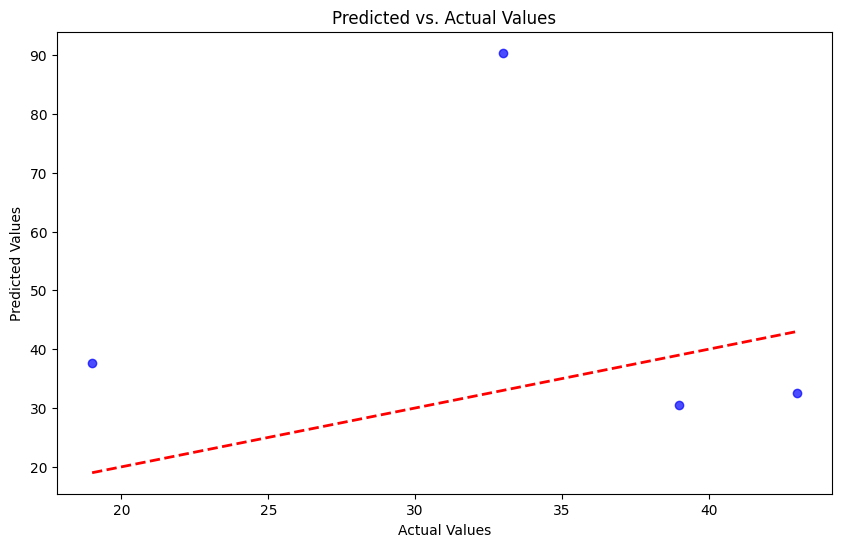

Coefficients: [-2.54385081e+01  1.81474586e+02 -2.37859016e-01  1.68952027e+01
  2.79432821e+00 -5.55150206e-02  1.41968236e-01  1.41968236e-01
 -5.52494587e-01 -3.01917744e-04  1.90065301e-02]
Intercept: -118.16977402910419


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


target = 'total_wai'  # Target variable column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[cols_cleaned_p], df[target], test_size=0.2, random_state=42)

# Create the linear regression model
regressor = LinearRegression()

# Perform cross-validation and calculate cross-validated R-squared
cv_r2_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')

# Train the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared for the predictions
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate mean and standard deviation of cross-validated R-squared
print("Cross-Validated R-squared Scores:", cv_r2_scores)
print("Mean Cross-Validated R-squared:", np.mean(cv_r2_scores))
print("Standard Deviation of Cross-Validated R-squared:", np.std(cv_r2_scores))

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

# Display the coefficients and intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)


plot distribution of WAI

Take the sessions with low WAI
Take the sessions with high WAI

Plot the features of each row as dot for low and high WAI in one figure with different colours - bar graph but with dots

In [ ]:
df

,ppnr,session,min_arousal_audio,max_arousal_audio,min_valence_audio,max_valence_audio,min_dominance_audio,max_dominance_audio,neutral,anger,...,8,9,10,11,12,total_wai,task_df,goal_df,bond_df,category
0,1006,9,0.109176,0.294326,0.329493,0.458579,0.117108,0.277770,NaN,NaN,...,3,4.0,5.0,1,0,37.0,11.0,10,16.0,high
1,1002,7,0.212192,0.388264,0.392265,0.477895,0.192884,0.332112,NaN,NaN,...,0,0.0,7.0,0,0,14.0,7.0,7,0.0,low
2,1003,9,0.355444,0.577676,0.438624,0.636785,0.325384,0.525889,NaN,NaN,...,3,4.0,5.0,2,3,43.0,15.0,12,16.0,high
3,5041,6,0.023456,0.199226,0.347699,0.404194,0.080595,0.248277,NaN,NaN,...,3,2.0,4.0,3,3,36.0,13.0,12,11.0,high
4,5014,7,0.166616,0.374330,0.362213,0.473818,0.158829,0.336542,NaN,NaN,...,3,2.0,5.0,2,2,33.0,13.0,10,10.0,low
5,4019,8,0.193457,0.481128,0.371764,0.581824,0.190595,0.416191,NaN,NaN,...,2,1.0,5.0,2,1,26.0,9.0,10,7.0,low
6,5042,8,0.220689,0.307643,0.371661,0.528665,0.182311,0.294635,NaN,NaN,...,4,2.0,5.0,2,2,33.0,11.0,12,10.0,low
7,5042,10,0.195498,0.375666,0.400168,0.585067,0.174474,0.340906,NaN,NaN,...,3,2.0,5.0,2,2,32.0,12.0,11,9.0,low
8,5007,2,0.079448,0.168508,0.338198,0.386067,0.112563,0.192294,NaN,NaN,...,4,4.0,6.0,2,2,37.0,12.0,11,14.0,high
9,1026,4,0.344822,0.537287,0.467950,0.641246,0.324016,0.504099,NaN,NaN,...,4,4.0,4.0,4,4,45.0,15.0,14,16.0,high


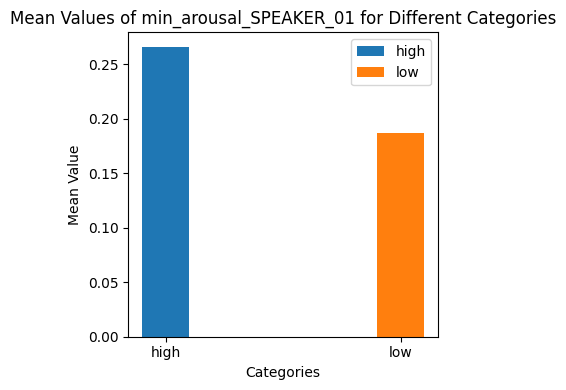

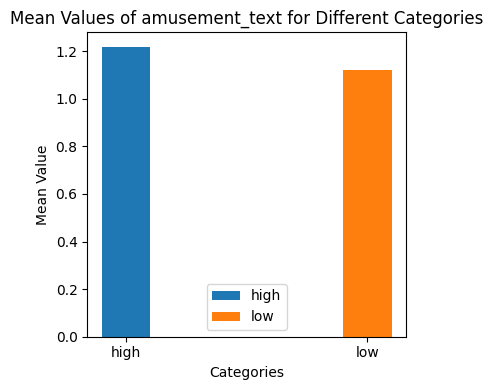

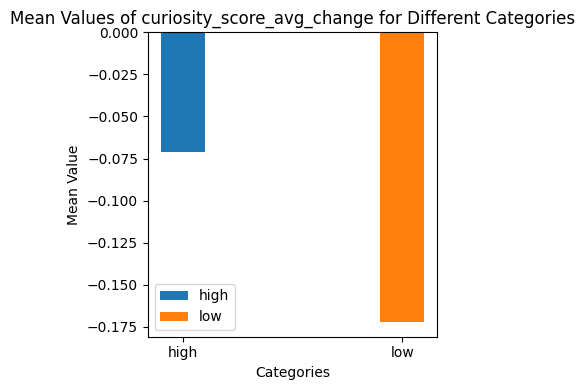

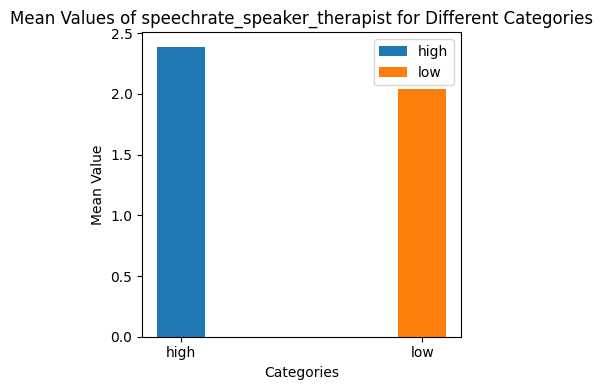

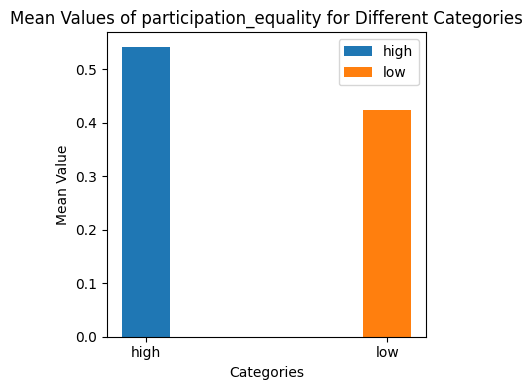

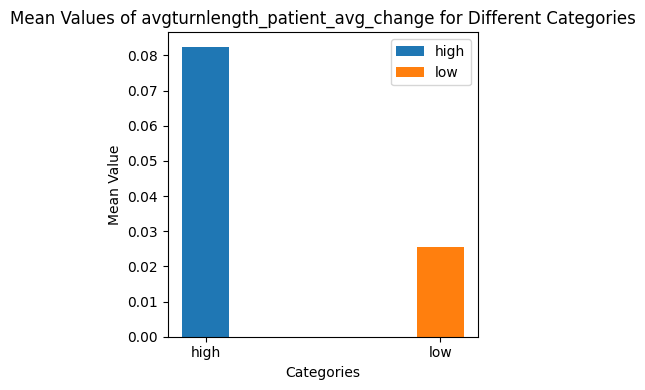

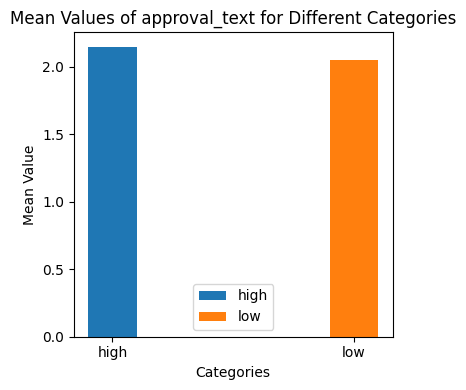

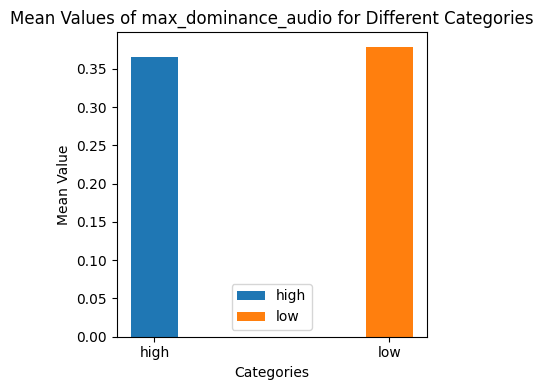

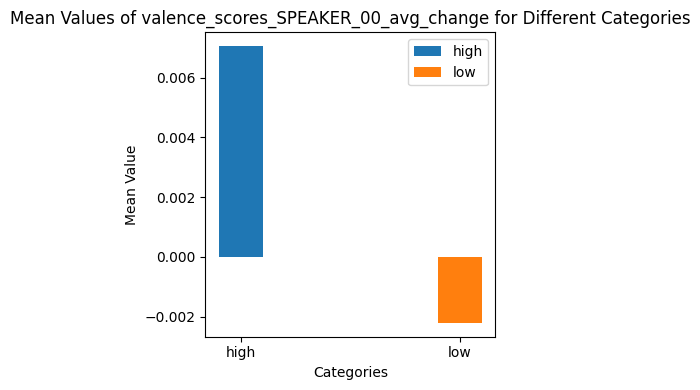

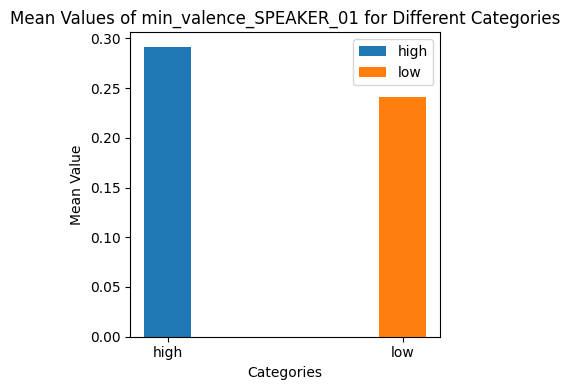

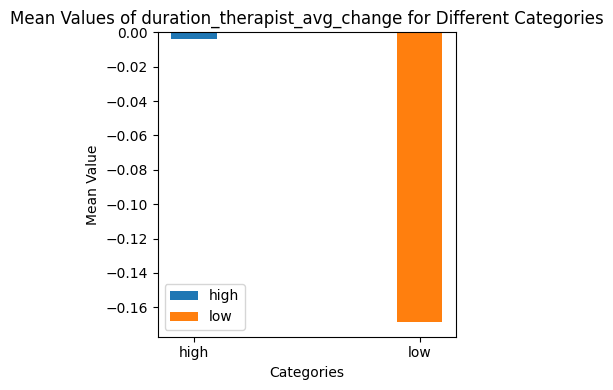

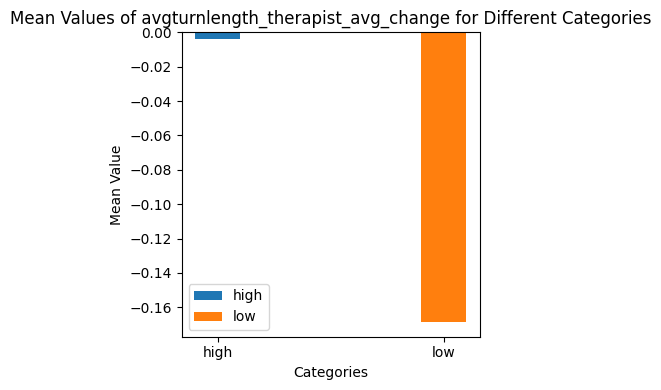

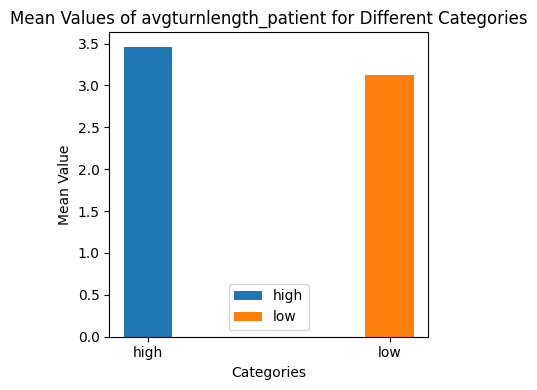

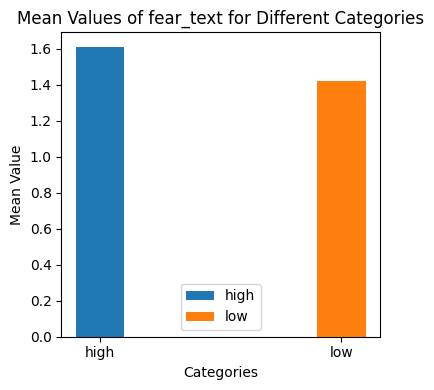

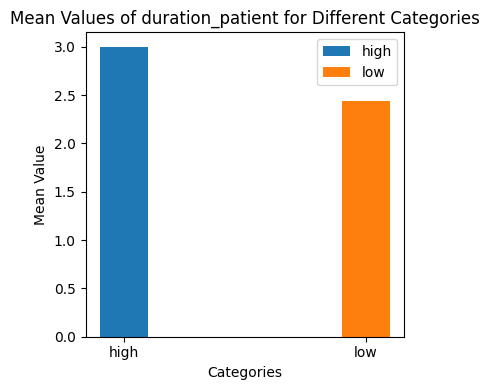

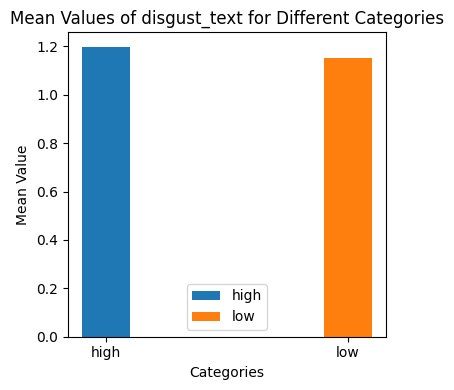

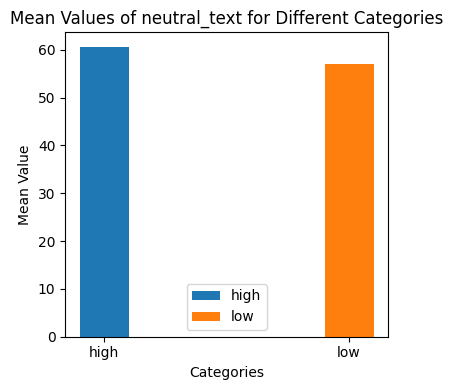

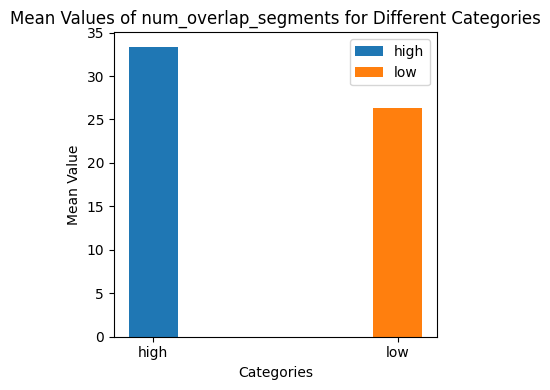

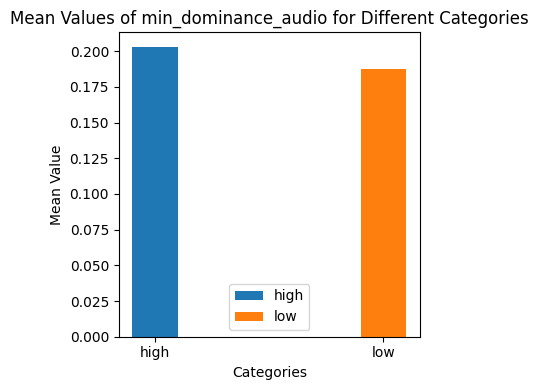

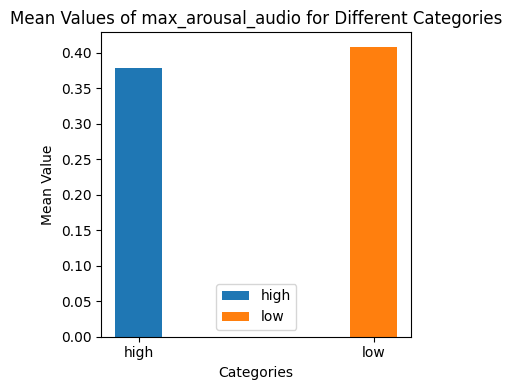

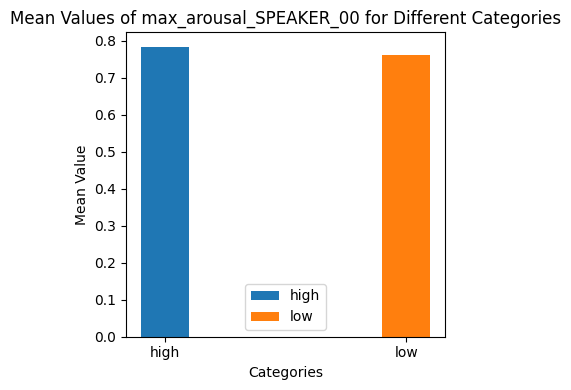

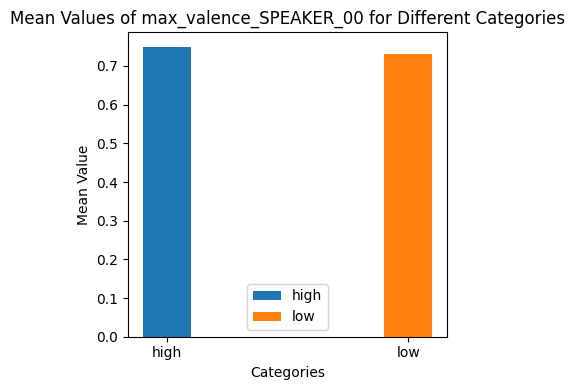

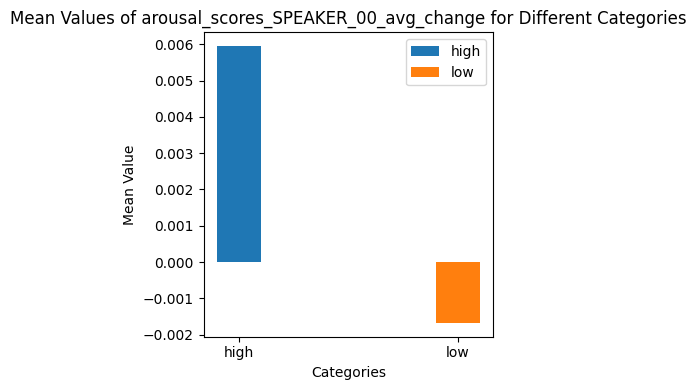

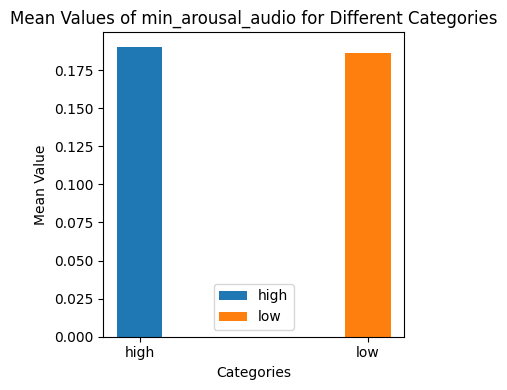

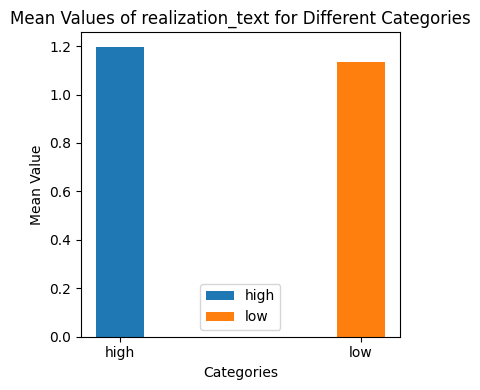

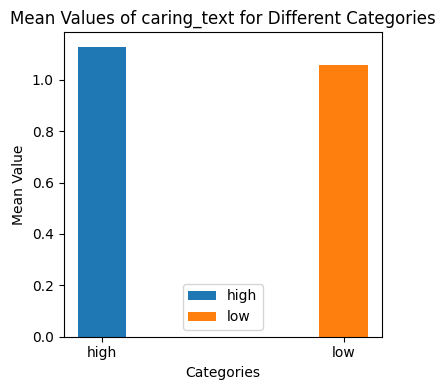

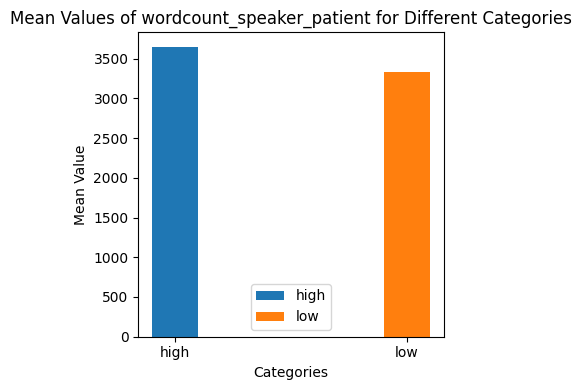

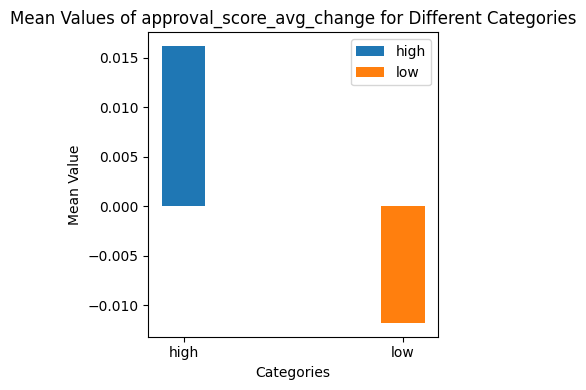

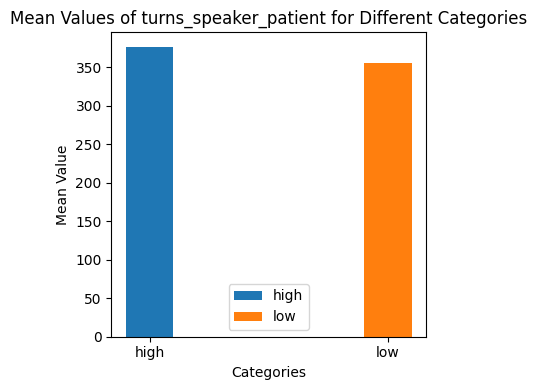

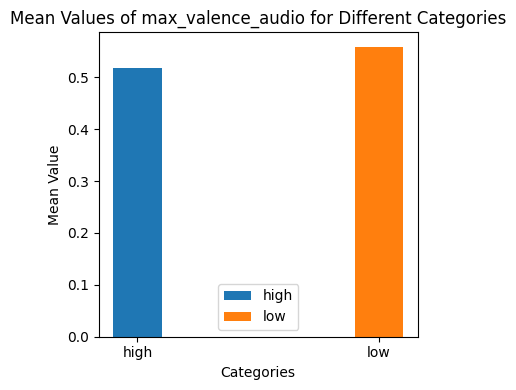

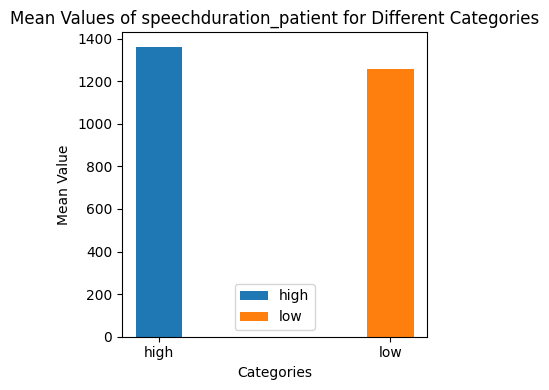

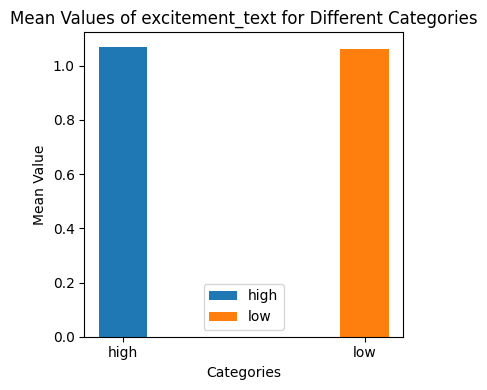

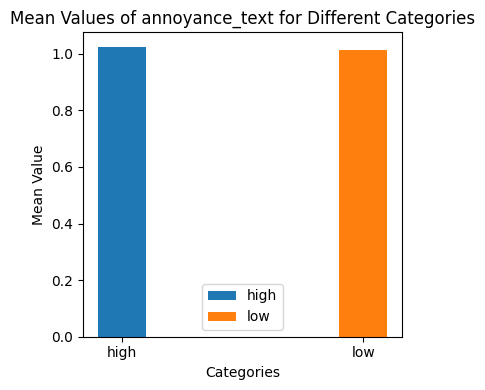

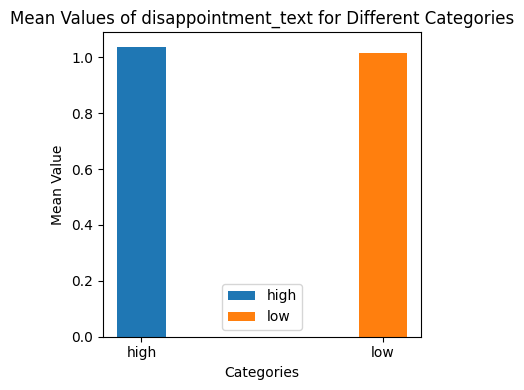

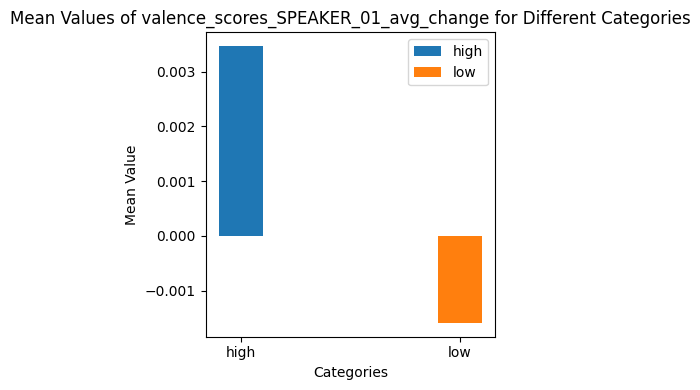

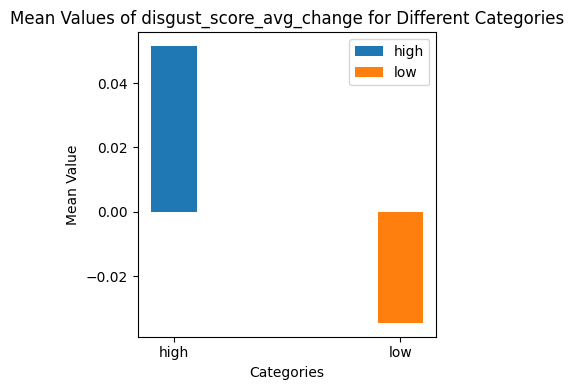

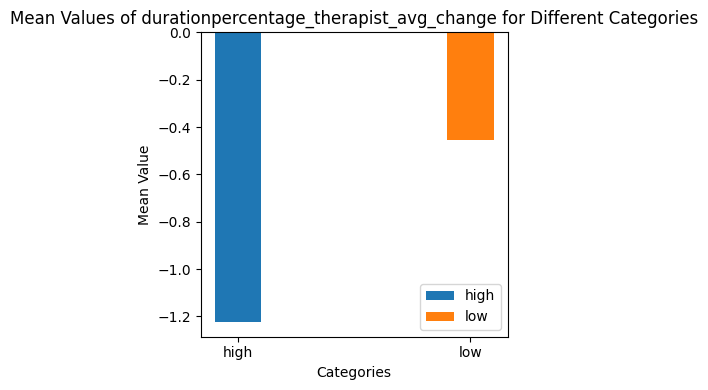

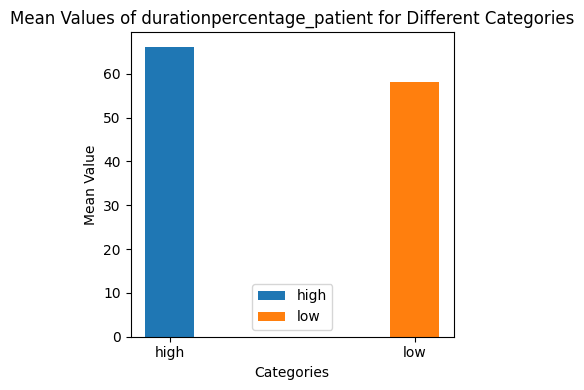

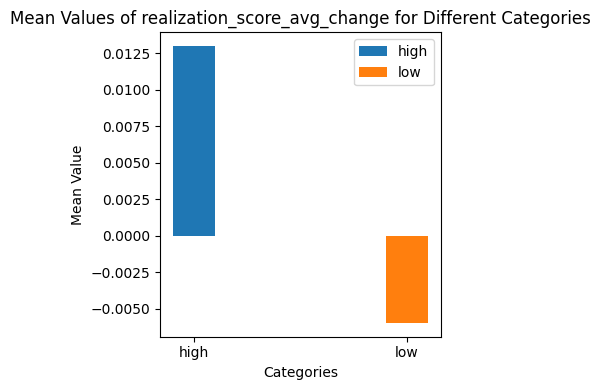

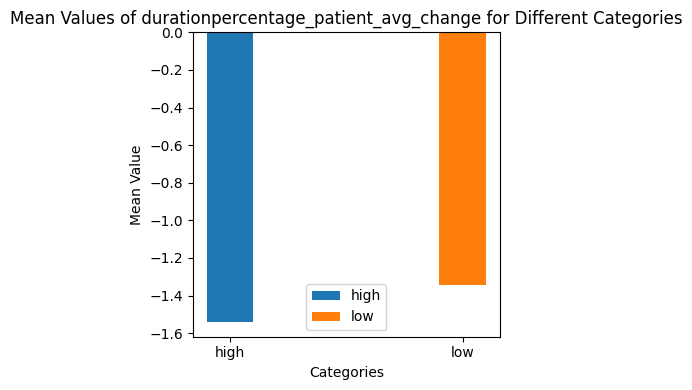

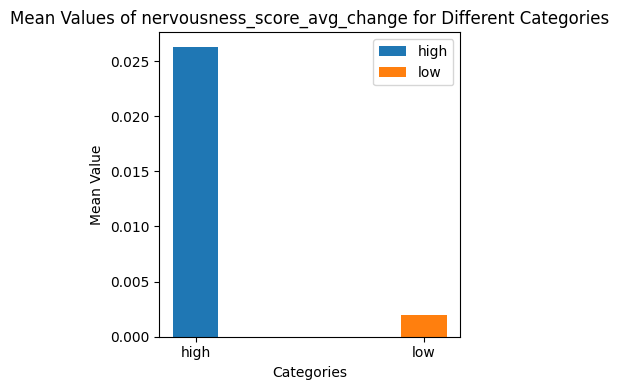

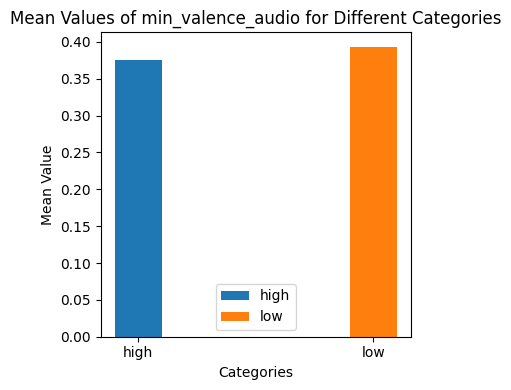

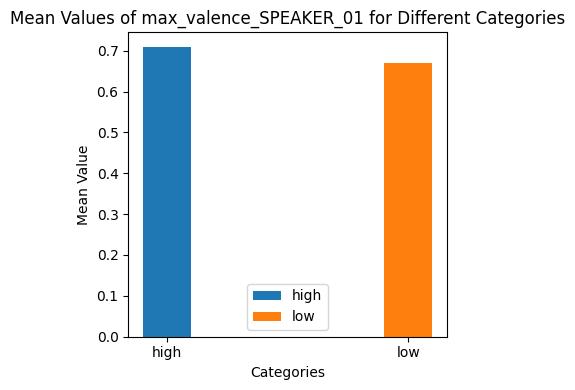

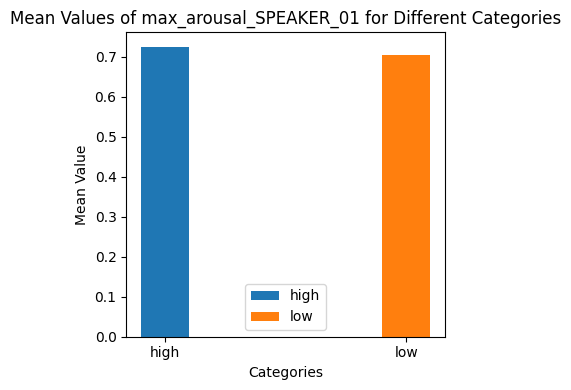

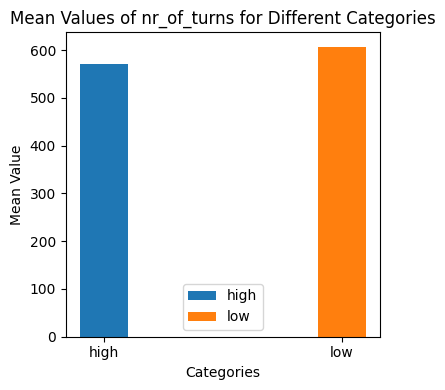

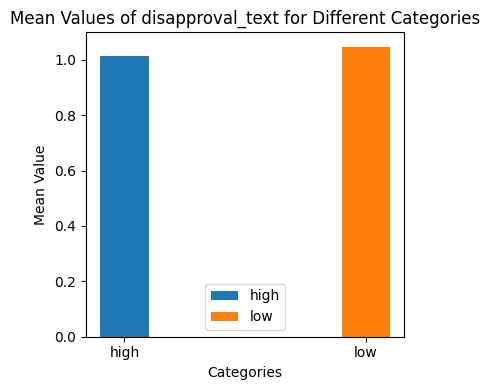

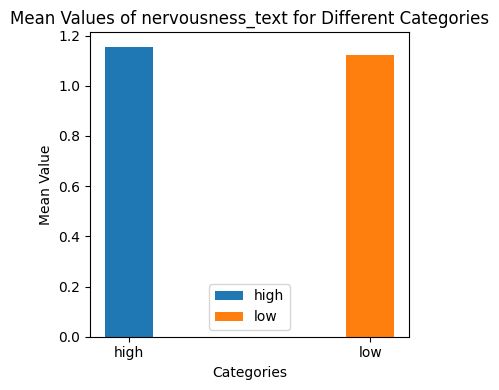

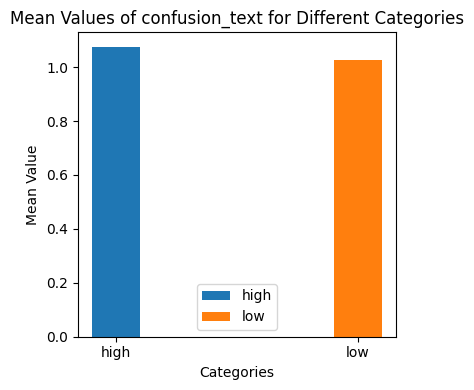

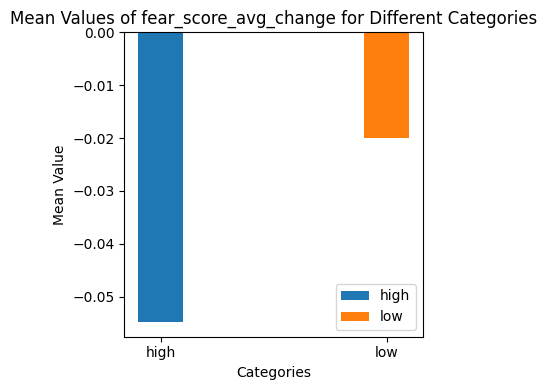

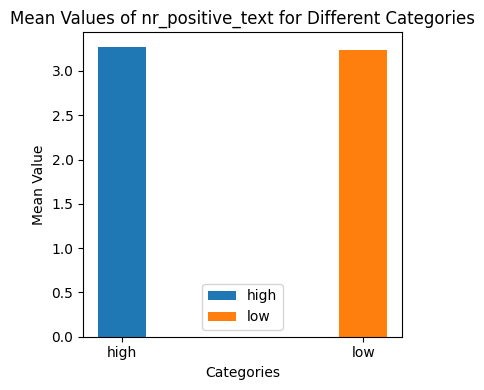

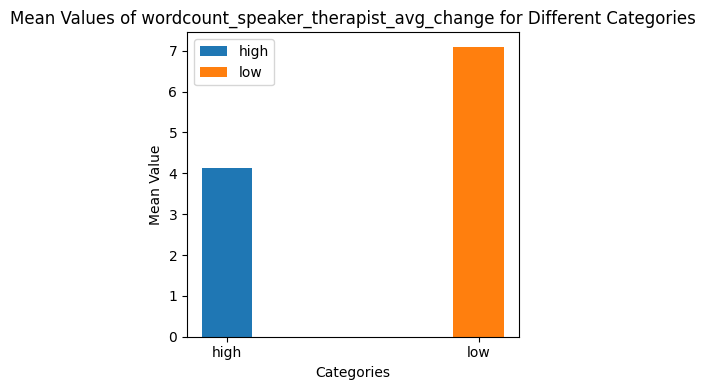

In [ ]:
# df['categories'] = categories

import pandas as pd
import matplotlib.pyplot as plt

# Separate the features and labels
# features = df.drop(columns=['categories'])
labels = df['category']

features= df[features_mrmr]

# Group the data by the "categories" column and calculate the mean for each feature
grouped = df.groupby('category').mean()

# Loop through each feature and create individual bar plots
for feature in features.columns:
    fig, ax = plt.subplots(figsize=(4, 4))

    # Set the positions for the bars
    x = range(len(grouped.index))

    # Loop through each category and plot bars
    for i, category in enumerate(grouped.index):
        ax.bar(x[i], grouped.loc[category, feature], width=0.2, label=category)

    # Customize the plot
    ax.set_xticks(x)
    ax.set_xticklabels(grouped.index)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Mean Value')
    ax.set_title(f'Mean Values of {feature} for Different Categories')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


# ready plots feature selection

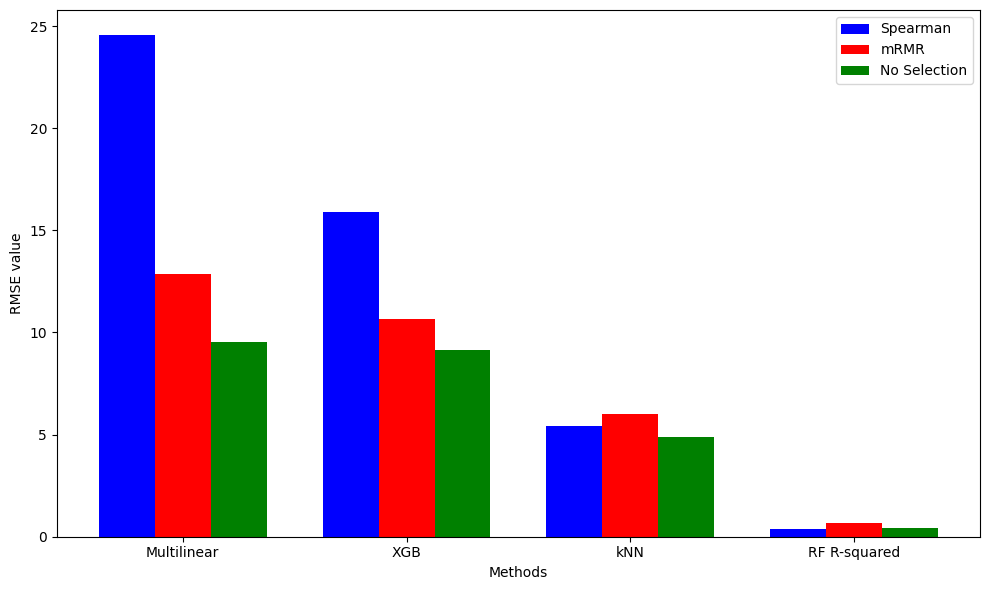

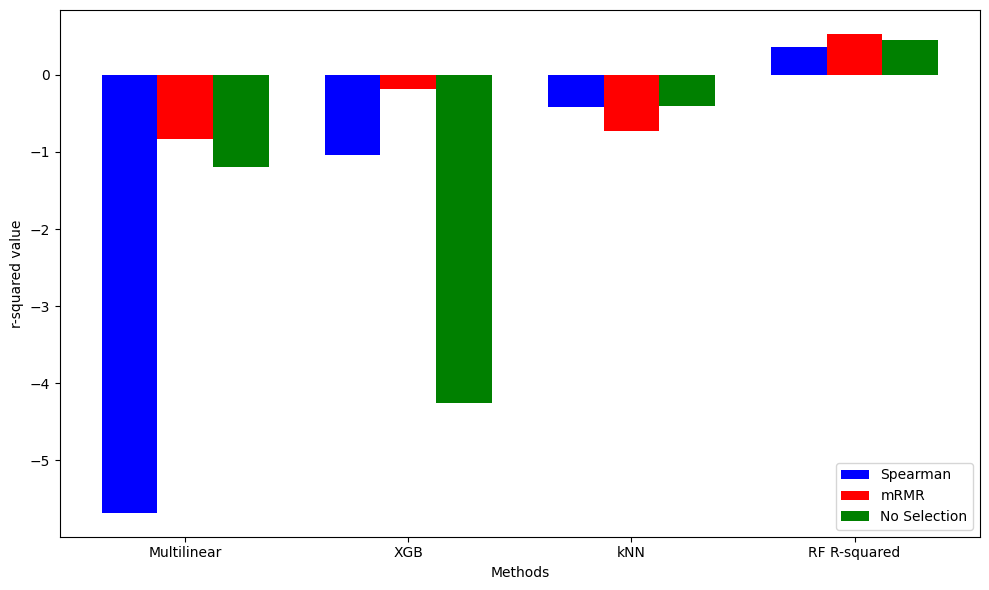

In [ ]:
# observer
import matplotlib.pyplot as plt
import numpy as np

# Data for different feature selection methods
methods = ['Multilinear', 'XGB', 'kNN', 'RF R-squared']
spearman_rmse = [24.56, 15.88, 5.44, 0.36]
mrmr_rmse = [12.84, 10.65, 6.00, 0.66]
no_selection_rmse = [9.55, 9.15, 4.89, 0.45]


spearman_rmse_norm = (spearman_rmse)
mrmr_rmse_norm = (mrmr_rmse)
no_selection_rmse_norm = (no_selection_rmse)

bar_width = 0.25
index = np.arange(len(methods))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, spearman_rmse_norm, bar_width, color='blue', label='Spearman')
plt.bar(index + bar_width, mrmr_rmse_norm, bar_width, color='red', label='mRMR')
plt.bar(index + 2 * bar_width, no_selection_rmse_norm, bar_width, color='green', label='No Selection')

plt.xlabel('Methods')
plt.ylabel('RMSE value')
plt.xticks(index + bar_width, methods)
plt.legend()
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import numpy as np

# Data for different feature selection methods
methods = ['Multilinear', 'XGB', 'kNN', 'RF R-squared']
spearman_r_squared = [-5.68, -1.04, -0.42, 0.36]
mrmr_r_squared = [-0.83, -0.18, -0.73, 0.53]
no_selection_r_squared = [-1.20, -4.26, -0.40, 0.45]

spearman_r_squared_norm = (spearman_r_squared)
mrmr_r_squared_norm = (mrmr_r_squared)
no_selection_r_squared_norm = (no_selection_r_squared)

bar_width = 0.25
index = np.arange(len(methods))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, spearman_r_squared_norm, bar_width, color='blue', label='Spearman')
plt.bar(index + bar_width, mrmr_r_squared_norm, bar_width, color='red', label='mRMR')
plt.bar(index + 2 * bar_width, no_selection_r_squared_norm, bar_width, color='green', label='No Selection')

plt.xlabel('Methods')
plt.ylabel('r-squared value')
plt.xticks(index + bar_width, methods)
plt.legend()
plt.tight_layout()
plt.show()



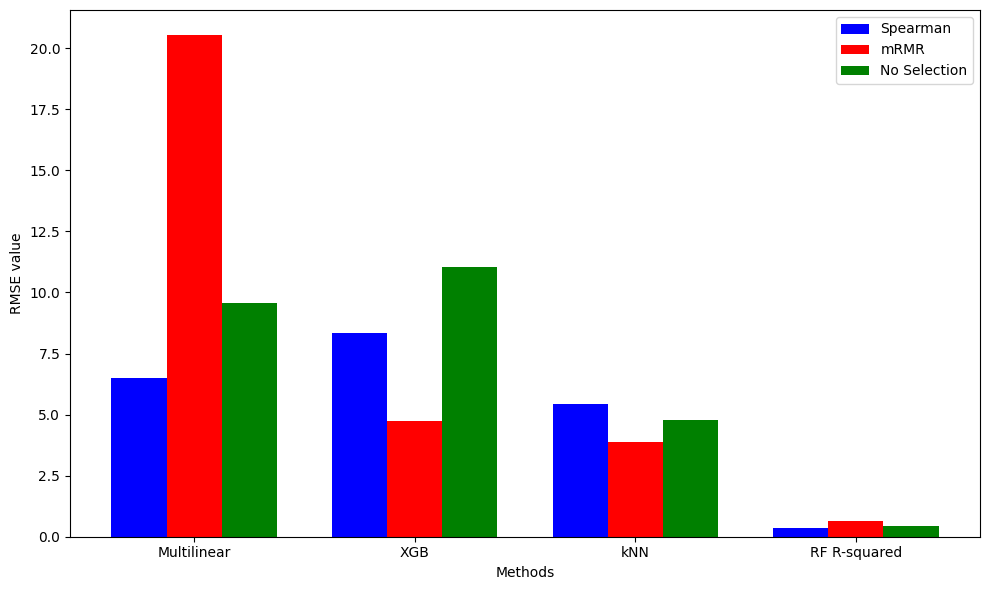

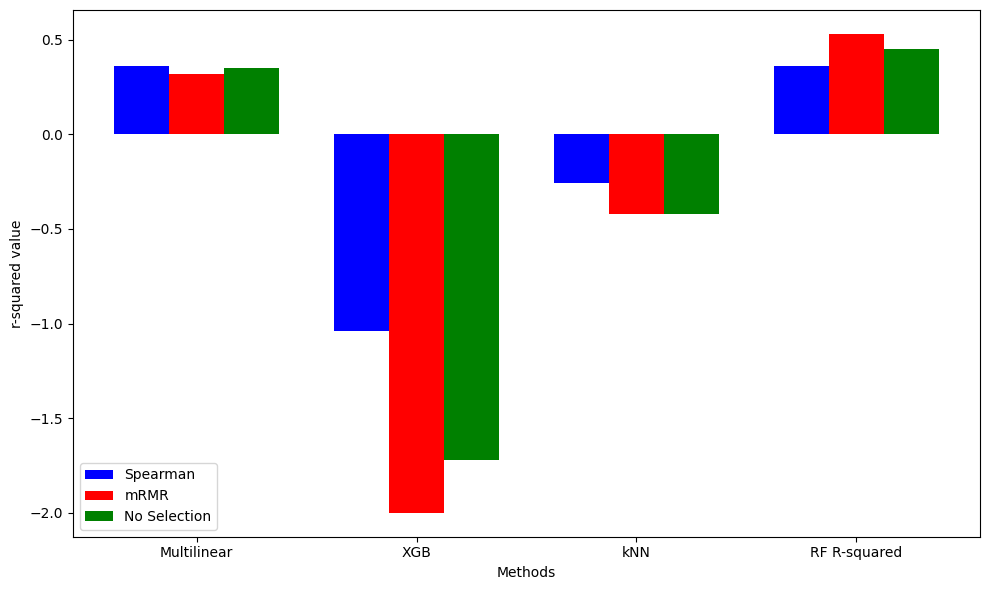

In [ ]:
# patient
import matplotlib.pyplot as plt
import numpy as np

# Data for Spearman feature selection
methods = ['Multilinear', 'XGB', 'kNN', 'RF R-squared']
spearman_rmse = [6.50, 8.36, 5.44, 0.36]
mrmr_rmse = [20.54, 4.72, 3.87, 0.66]
no_selection_rmse = [9.57, 11.06, 4.79, 0.45]


spearman_rmse_norm = (spearman_rmse)
mrmr_rmse_norm = (mrmr_rmse)
no_selection_rmse_norm = (no_selection_rmse)

bar_width = 0.25
index = np.arange(len(methods))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, spearman_rmse_norm, bar_width, color='blue', label='Spearman')
plt.bar(index + bar_width, mrmr_rmse_norm, bar_width, color='red', label='mRMR')
plt.bar(index + 2 * bar_width, no_selection_rmse_norm, bar_width, color='green', label='No Selection')

plt.xlabel('Methods')
plt.ylabel('RMSE value')

plt.xticks(index + bar_width, methods)
plt.legend()
plt.tight_layout()
plt.show()



# patient
import matplotlib.pyplot as plt
import numpy as np

# Data for different feature selection methods
methods = ['Multilinear', 'XGB', 'kNN', 'RF R-squared']
spearman_r_squared = [0.36, -1.04, -0.26, 0.36]
mrmr_r_squared = [0.32, -2, -0.42, 0.53]
no_selection_r_squared = [0.35, -1.72, -0.42, 0.45]
# XGB mrmr_r_squared was way larger, but for the plot made smaller (-30.80)



spearman_r_squared_norm = (spearman_r_squared)
mrmr_r_squared_norm = (mrmr_r_squared)
no_selection_r_squared_norm = (no_selection_r_squared)

bar_width = 0.25
index = np.arange(len(methods))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, spearman_r_squared_norm, bar_width, color='blue', label='Spearman')
plt.bar(index + bar_width, mrmr_r_squared_norm, bar_width, color='red', label='mRMR')
plt.bar(index + 2 * bar_width, no_selection_r_squared_norm, bar_width, color='green', label='No Selection')

plt.xlabel('Methods')
plt.ylabel('r-squared value')

plt.xticks(index + bar_width, methods)
plt.legend()
plt.tight_layout()
plt.show()



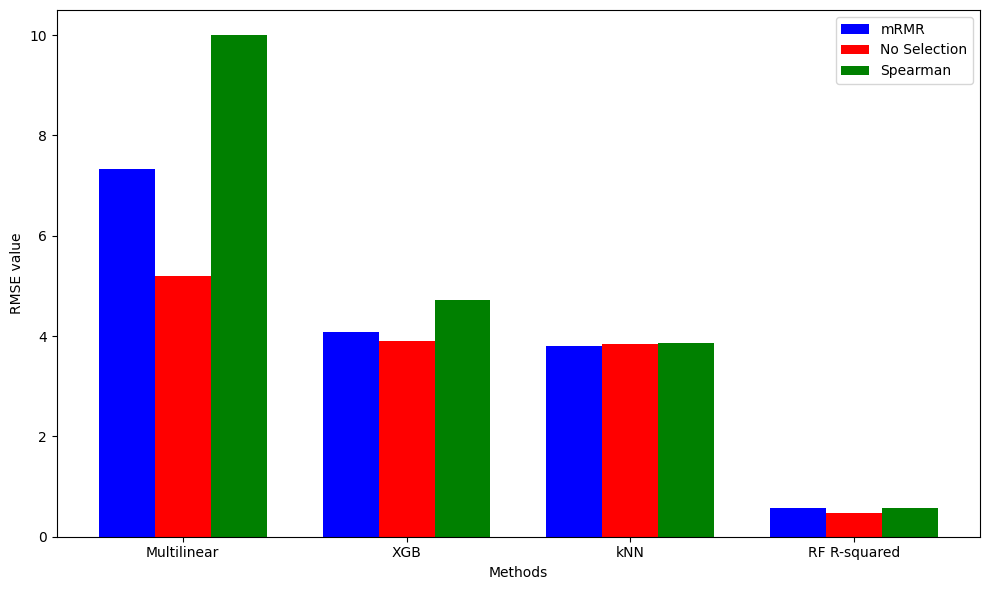

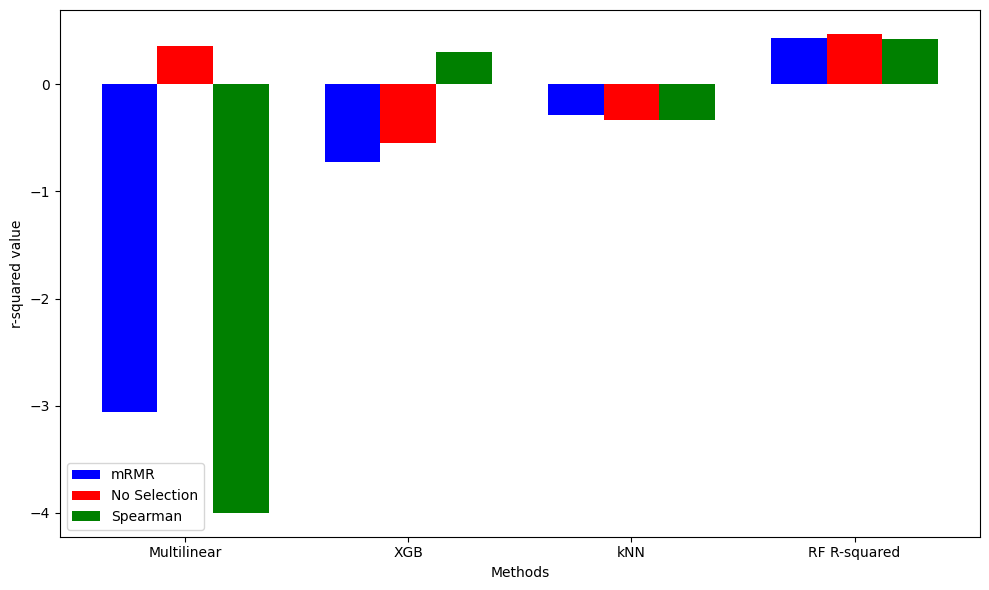

In [ ]:
# therapist
import matplotlib.pyplot as plt
import numpy as np

# Data for different feature selection methods
methods = ['Multilinear', 'XGB', 'kNN', 'RF R-squared']
mrmr_rmse = [7.34, 4.08, 3.81, 0.57]
no_selection_rmse = [5.20, 3.91, 3.85, 0.48]
spearman_rmse = [10, 4.72, 3.87, 0.57]
# spearman_rmse multilinear was way larger, but for the plot made smaller

mrmr_rmse_norm = (mrmr_rmse)
no_selection_rmse_norm = (no_selection_rmse)
spearman_rmse_norm = (spearman_rmse)

bar_width = 0.25
index = np.arange(len(methods))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, mrmr_rmse_norm, bar_width, color='blue', label='mRMR')
plt.bar(index + bar_width, no_selection_rmse_norm, bar_width, color='red', label='No Selection')
plt.bar(index + 2 * bar_width, spearman_rmse_norm, bar_width, color='green', label='Spearman')

plt.xlabel('Methods')
plt.ylabel('RMSE value')
plt.xticks(index + bar_width, methods)
plt.legend()
plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt
import numpy as np

# Data for different feature selection methods
methods = ['Multilinear', 'XGB', 'kNN', 'RF R-squared']
mrmr_r_squared = [-3.06, -0.73, -0.29, 0.43]
no_selection_r_squared = [0.36, -0.55, -0.33, 0.47]
spearman_r_squared = [-4, 0.30, -0.33, 0.42]
# spearman_r_squared multilinear was way larger, but for the plot made smaller




mrmr_r_squared_norm = (mrmr_r_squared)
no_selection_r_squared_norm = (no_selection_r_squared)
spearman_r_squared_norm = (spearman_r_squared)

bar_width = 0.25
index = np.arange(len(methods))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, mrmr_r_squared_norm, bar_width, color='blue', label='mRMR')
plt.bar(index + bar_width, no_selection_r_squared_norm, bar_width, color='red', label='No Selection')
plt.bar(index + 2 * bar_width, spearman_r_squared_norm, bar_width, color='green', label='Spearman')

plt.xlabel('Methods')
plt.ylabel('r-squared value')
plt.xticks(index + bar_width, methods)
plt.legend()
plt.tight_layout()
plt.show()


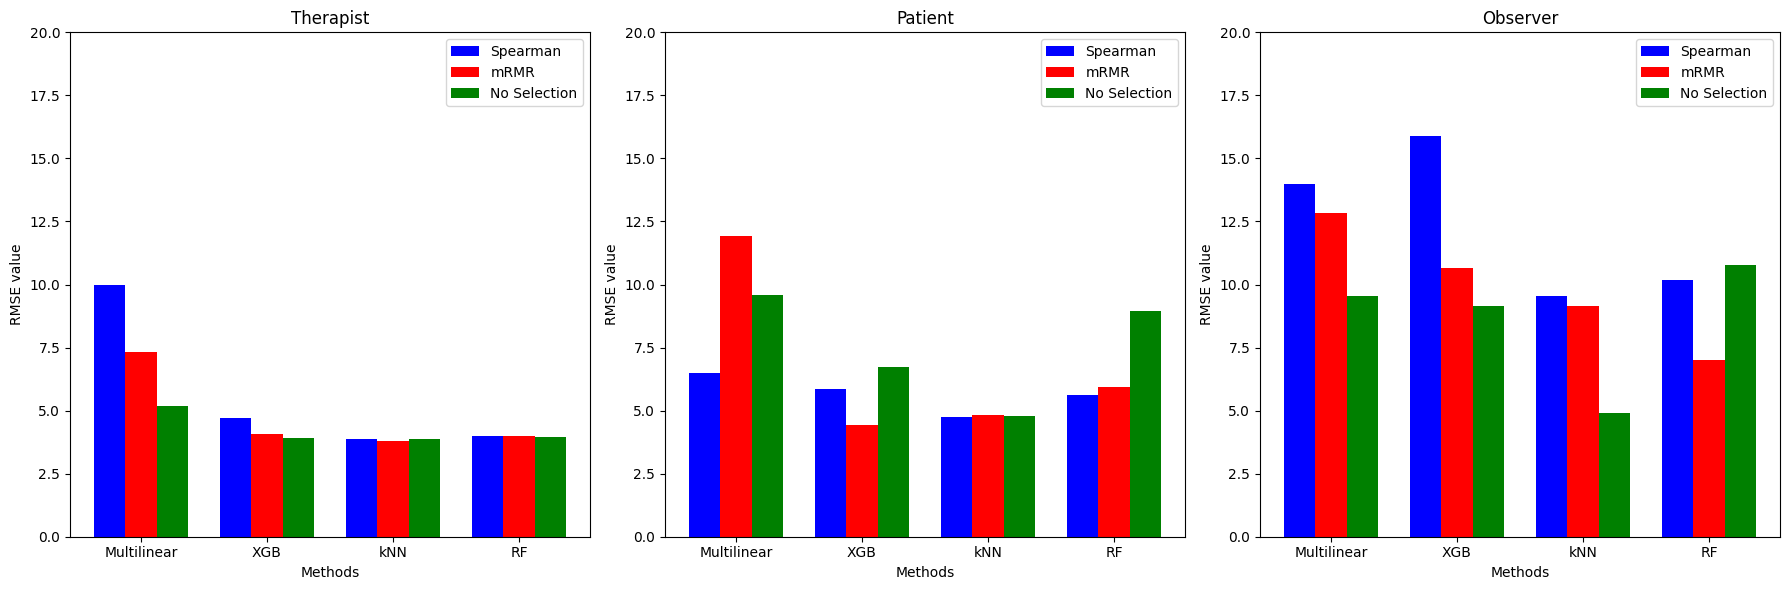

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for therapist feature selection
methods = ['Multilinear', 'XGB', 'kNN', 'RF']
no_selection_rmse  = [5.20, 3.91, 3.86, 3.97]
spearman_rmse = [10, 4.72, 3.87,  3.99]
mrmr_rmse = [7.34, 4.08, 3.81, 4.01]  # Adjusted for visualization
# spearman_rmse multilinear asjusted

# Normalize data
def normalize_data(data):
    max_value = max(data)
    return data

mrmr_rmse_norm = normalize_data(mrmr_rmse)
no_selection_rmse_norm = normalize_data(no_selection_rmse)
spearman_rmse_norm = normalize_data(spearman_rmse)

bar_width = 0.25
index = np.arange(len(methods))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Set y-axis limits
y_limit = (0, 20)

# Plotting for therapist
axes[0].bar(index, spearman_rmse_norm, bar_width, color='blue', label='Spearman')
axes[0].bar(index + bar_width, mrmr_rmse_norm, bar_width, color='red', label='mRMR')
axes[0].bar(index + 2 * bar_width, no_selection_rmse_norm, bar_width, color='green', label='No Selection')
axes[0].set_xlabel('Methods')
axes[0].set_ylabel('RMSE value')
axes[0].set_title('Therapist')
axes[0].set_xticks(index + bar_width)
axes[0].set_xticklabels(methods)
axes[0].legend()
axes[0].set_ylim(y_limit)

# Data for patient feature selection
spearman_rmse_patient = [6.50,  5.84,  4.75, 5.61]
mrmr_rmse_patient = [11.92, 4.44, 4.81 , 5.92]
no_selection_rmse_patient = [9.58, 6.72 , 4.80, 8.97]


spearman_rmse_patient_norm = normalize_data(spearman_rmse_patient)
mrmr_rmse_patient_norm = normalize_data(mrmr_rmse_patient)
no_selection_rmse_patient_norm = normalize_data(no_selection_rmse_patient)

# Plotting for patient
axes[1].bar(index, spearman_rmse_patient_norm, bar_width, color='blue', label='Spearman')
axes[1].bar(index + bar_width, mrmr_rmse_patient_norm, bar_width, color='red', label='mRMR')
axes[1].bar(index + 2 * bar_width, no_selection_rmse_patient_norm, bar_width, color='green', label='No Selection')
axes[1].set_xlabel('Methods')
axes[1].set_ylabel('RMSE value')
axes[1].set_title('Patient')
axes[1].set_xticks(index + bar_width)
axes[1].set_xticklabels(methods)
axes[1].legend()
axes[1].set_ylim(y_limit)

# Data for observer feature selection
spearman_rmse_observer = [14, 15.88, 9.55, 10.18] # spearman_rmse_observer multilinear adjusted
mrmr_rmse_observer = [12.84, 10.65, 9.15, 7.02]
no_selection_rmse_observer = [9.55, 9.15, 4.89, 10.76]


spearman_rmse_observer_norm = normalize_data(spearman_rmse_observer)
mrmr_rmse_observer_norm = normalize_data(mrmr_rmse_observer)
no_selection_rmse_observer_norm = normalize_data(no_selection_rmse_observer)

# Plotting for observer
axes[2].bar(index, spearman_rmse_observer_norm, bar_width, color='blue', label='Spearman')
axes[2].bar(index + bar_width, mrmr_rmse_observer_norm, bar_width, color='red', label='mRMR')
axes[2].bar(index + 2 * bar_width, no_selection_rmse_observer_norm, bar_width, color='green', label='No Selection')
axes[2].set_xlabel('Methods')
axes[2].set_ylabel('RMSE value')
axes[2].set_title('Observer')
axes[2].set_xticks(index + bar_width)
axes[2].set_xticklabels(methods)
axes[2].legend()
axes[2].set_ylim(y_limit)

# Adjust layout
plt.tight_layout()
plt.show()


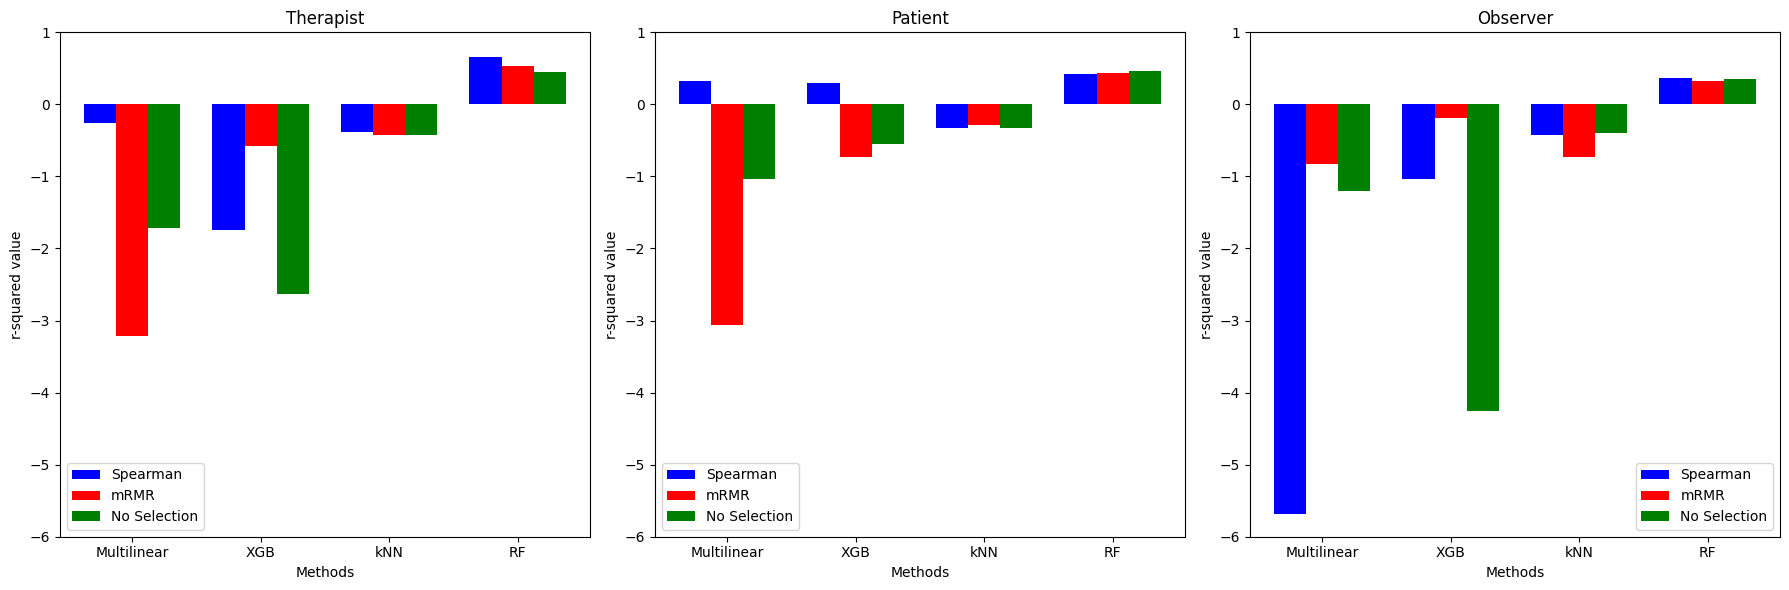

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

methods = ['Multilinear', 'XGB', 'kNN', 'RF']
spearman_r_squared = [-0.26, -1.74, -0.39,  0.66]
mrmr_r_squared = [-3.22, -0.58, -0.43, 0.53]
no_selection_r_squared = [-1.72, -2.63 , -0.42, 0.45 ]


# Normalize data
def normalize_data(data):
    max_value = max(data)
    return data

mrmr_rmse_norm = normalize_data(mrmr_r_squared)
no_selection_rmse_norm = normalize_data(no_selection_r_squared)
spearman_rmse_norm = normalize_data(spearman_r_squared)

bar_width = 0.25
index = np.arange(len(methods))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Set y-axis limits
y_limit = (-6, 1)

# Plotting for therapist
axes[0].bar(index, spearman_rmse_norm, bar_width, color='blue', label='Spearman')
axes[0].bar(index + bar_width, mrmr_rmse_norm, bar_width, color='red', label='mRMR')
axes[0].bar(index + 2 * bar_width, no_selection_rmse_norm, bar_width, color='green', label='No Selection')
axes[0].set_xlabel('Methods')
axes[0].set_ylabel('r-squared value')
axes[0].set_title('Therapist')
axes[0].set_xticks(index + bar_width)
axes[0].set_xticklabels(methods)
axes[0].legend()
axes[0].set_ylim(y_limit)

methods = ['Multilinear', 'XGB', 'kNN', 'RF']
no_selection_r_squared = [-1.04, -0.55, -0.33, 0.47]
spearman_r_squared = [0.32, 0.30, -0.33, 0.42]
mrmr_r_squared = [-3.06, -0.73, -0.29, 0.43]
# XGB mrmr_r_squared was way larger, but for the plot made smaller (-30.80)



# Plotting for patient
axes[1].bar(index, spearman_r_squared, bar_width, color='blue', label='Spearman')
axes[1].bar(index + bar_width, mrmr_r_squared, bar_width, color='red', label='mRMR')
axes[1].bar(index + 2 * bar_width, no_selection_r_squared, bar_width, color='green', label='No Selection')
axes[1].set_xlabel('Methods')
axes[1].set_ylabel('r-squared value')
axes[1].set_title('Patient')
axes[1].set_xticks(index + bar_width)
axes[1].set_xticklabels(methods)
axes[1].legend()
axes[1].set_ylim(y_limit)


methods = ['Multilinear', 'XGB', 'kNN', 'RF']
spearman_r_squared = [-5.68, -1.04, -0.42, 0.36]
mrmr_r_squared = [-0.83,-0.19, -0.73, 0.32]
no_selection_r_squared = [-1.20, -4.26, -0.40, 0.35]


# Plotting for observer
axes[2].bar(index, spearman_r_squared, bar_width, color='blue', label='Spearman')
axes[2].bar(index + bar_width, mrmr_r_squared, bar_width, color='red', label='mRMR')
axes[2].bar(index + 2 * bar_width, no_selection_r_squared, bar_width, color='green', label='No Selection')
axes[2].set_xlabel('Methods')
axes[2].set_ylabel('r-squared value')
axes[2].set_title('Observer')
axes[2].set_xticks(index + bar_width)
axes[2].set_xticklabels(methods)
axes[2].legend()
axes[2].set_ylim(y_limit)

# Adjust layout
plt.tight_layout()
plt.show()


# plot models

In [ ]:
!pip install tabulate


In [ ]:
import pandas as pd

# Data for the Patient table
data_patient = {
    "Feature Selection": ["mRMR", "No Feature Selection", "No Feature Selection", "No Feature Selection"],
    "RMSE / MSE / R-squared / MAE": [6.50, 42.29, -0.26, 4.73],
    "mRMR": [11.92, 141.98, -3.22, 8.17],
    "No Feature Selection": [9.58, 91.71, -1.72, 7.12]
}

# Data for the Observer table
data_observer = {
    "Feature Selection": ["mRMR", "No Feature Selection", "No Feature Selection", "No Feature Selection"],
    "RMSE / MSE / R-squared / MAE": [24.56, 603.31, -5.68, 13.72],
    "mRMR": [12.84, 164.95, -0.83, 9.33],
    "No Feature Selection": [9.55, 91.19, -1.20, 7.38]
}

# Data for the Therapist table
data_therapist = {
    "Feature Selection": ["mRMR", "No Feature Selection", "No Feature Selection", "No Feature Selection"],
    "RMSE / MSE / R-squared / MAE": [20.54, 422.11, -30.80, 7.12],
    "mRMR": [7.34, 53.90, -3.06, 6.23],
    "No Feature Selection": [5.20, 27.05, -1.04, 4.41]
}

# Create DataFrames for each table
df_patient = pd.DataFrame(data_patient)
df_observer = pd.DataFrame(data_observer)
df_therapist = pd.DataFrame(data_therapist)

# Print the tables
print("Patient Table:")
print(df_patient)
print("\nObserver Table:")
print(df_observer)
print("\nTherapist Table:")
print(df_therapist)


Patient Table:
      Feature Selection  RMSE / MSE / R-squared / MAE    mRMR  \
0                  mRMR                          6.50   11.92   
1  No Feature Selection                         42.29  141.98   
2  No Feature Selection                         -0.26   -3.22   
3  No Feature Selection                          4.73    8.17   

   No Feature Selection  
0                  9.58  
1                 91.71  
2                 -1.72  
3                  7.12  

Observer Table:
      Feature Selection  RMSE / MSE / R-squared / MAE    mRMR  \
0                  mRMR                         24.56   12.84   
1  No Feature Selection                        603.31  164.95   
2  No Feature Selection                         -5.68   -0.83   
3  No Feature Selection                         13.72    9.33   

   No Feature Selection  
0                  9.55  
1                 91.19  
2                 -1.20  
3                  7.38  

Therapist Table:
      Feature Selection  RMSE / MSE / 

# new try models


In [ ]:
import pandas as pd
df = pd.read_csv('/content/movement_pat.csv',delimiter=';')

# feat_df = pd.read_csv('/content/mrmr_filtered_df_pat.csv')
# features_mrmr = feat_df[feat_df['Importance'] > 0]["Feature"]

In [ ]:
columns = [ 'nod_speaker1_listening',
       'shake_speaker1_listening',
       'nod_speaker0_listening',
       'shake_speaker0_listening']

In [ ]:
df['4'] = 7 - df['4']
df['10'] = 7 - df['10']

bond_columns = ['3', '5', '7','9']
goal_columns = ['1', '4', '8','11']
task_columns = ['2', '6', '10','12']
all_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_columns].sum(axis=1)

df['total_wai'] = total_wai
df['task_df'] = task_df
df['goal_df'] = goal_df
df['bond_df'] = bond_df

cols = df.columns

columns_to_exclude = ['ppnr', 'session','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','bond_df','goal_df'
,'task_df','total_wai']

# Remove specified columns from the DataFrame
cols_cleaned = [col for col in cols if col not in columns_to_exclude]



In [ ]:
cols_cleaned_x = ['duration_patient','nr_of_turns','duration_therapist','participation_equality',
 'turn_level_freedom','avgturnlength_therapist',
 'avgturnlength_patient']

In [ ]:
X = df[cols_cleaned]
y = total_wai

In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
X_train = imputer.fit_transform(X_train_normalized)
X_test = imputer.transform(X_test_normalized)

from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print(rmse)

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print(rmse)

r2 = r2_score(y_test, test_preds)
print("R-squared:", r2)

4.867693955503411
3.80058475033046
R-squared: 0.4484221691858923


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 13)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print(train_rmse)

print(test_rmse)

r2 = r2_score(y_test, test_preds_grid)
print("R-squared:", r2)

{'n_neighbors': 3}
4.867693955503411
3.80058475033046
R-squared: 0.4484221691858923


In [ ]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds_grid, s=50, cmap=cmap)
f.colorbar(points)
plt.show()